**Проект**: Ed-Tech. Образовательный портал существующий уже 6 год, имеющий в своей продуктовой линейке вебинары, интенсивы, курсы, подписку, повышение квалификации, лид-магниты и трипвайеры.  

**Контекст**: Сформировалось понимание, что далнейший рост невозможен без работы над показателями портала. Масштабирование трафика уже не приводит к существенному росту прибыли. 

**Задача**: Для внедрения в работу портала процессов экспериментов и роста показателей необходимо было провести анализ работы портала, не масштабирует ли он в конечном счете убытки. Провести того, как покупают, через сколько времени, за сколько. Выявить разницу в покупательском поведении в зависимости от стартового продукта. И в конечном счете составить модель юнит-экономики для понимания точек приложения усилий.

**Разделы исследования**: <a id='stepend'></a>

1. [Импортируем необходимые библиотеки](#step1)</n>
2. [Загрузим необходимые данные](#step2)
3. [Сформируем основную таблицу - sales](#step3)
4. [Исследуем кол-во дней между первой покупкой и регистрацией](#step4)
5. [Исследуем кол-во покупок и периоды между покупками](#step5)
  * [5.1 Кол-во покупок по каждому типу продукта](#step_5_1)
  * [5.2 Распределение кол-ва покупок по году](#step_5_2)
  * [5.3 Кол-во покупок по на пользователя](#step_5_3)
  * [5.4 Среднее количество дней между покупками](#step_5_4)
  * [5.5 Кол-во дней между покупками по когортам](#step_5_5)



6. [Исследуем среднее кол-во покупок в каждой когорте и кол-во купленных продуктов по типам](#step6)
  * [6.1 Среднее кол-во покупок по когортам](#step_6_1)
  * [6.2 Кол-во купленных продуктов по типам по каждой когорте](#step_6_2)
  * [6.3 Сколько в среднем продуктов купит каждый пользователей в зависимости от первой покупки](#step_6_3)
  * [6.4 Конверсию до 11 покупки в зависимости от первой покупки](#step_6_4)


7. [Исследуем среднюю стоимость каждого типа продукта](#step7)


8. [Средний чек](#step8)
  * [8.1 Средний чек по всему порталу](#step_8_1)
  * [8.2 Средний чек по когортам](#step_8_2)
  * [8.3 Средний чек в зависимости от номера покупки с подпиской и без](#step_8_3)
  * [8.4 Средний чек по когортам в покупках под номерами 11,12,13,16,17,26,30](#step_8_4)
  * [8.5 Средний чек в первых 20 покупках](#step_8_5)
  * [8.6 Исследуем, за счет чего такой высокий средний чек в когорте](#step_8_6)


9. [Исследуем конверсию в первую покупку](#step9)
  * [9.1 Конверсия в первую покупку по когортам, суммарно, без разделения на продукты](#step_9_1)
  * [9.2 Конверсия в первую покупку по продуктам и когортам](#step_9_2)
  * [9.3 Конверсия в первую и последующие покупки в без разделения на продукты и когорты](#step_9_3)
  * [9.4 Общая таблица конверсии и кол-ва дней между покупками](#step_9_4)
  * [9.5. Конверсия во вторую и последующие покупки по когортам и комбинации продуктов](#step_9_5)


10. [Исследуем подписку](#step10)  
  *  [10.1 Сколько покупок подписок приходится на каждый номер покупки](#step_10_1)
  *  [10.2 Выделим среди подписок три тарифа](#step_10_2)
  *  [10.3 Общая таблица с подпиской](#step_10_3)
  *  [10.4 Исследуем конверсию в следующую подписку](#step_10_4)
  *  [10.5 Сравнение среднего чего клиента с подпиской и без](#step_10_5)
  
  
11. [Когортный анализ](#step11)
  * [11.1 Retention](#step_11_1)
  * [11.2 Retention кол-во покупателей](#step_11_2)
  * [11.3 Когортный анализ по доходу с учетом затрат](#step_11_3)
  * [11.4 Когорта анализ подписки](#step_11_4)
  
  
12. [Выводы и дальнейшие шаги](#step12)


13. [Модель юнит-экономики](#step13)
 

### `1. Импортируем необходимые библиотеки`<a id="step1"></a>

In [791]:
import pandas as pd
import numpy as np
import seaborn as sns
import datetime
from datetime import timedelta
from operator import attrgetter 
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import plotly.express as px


- Среднюю сумму продаж по первой покупке и последующих по когортам
- Как выглядят продажи, кто покупал много
- После скольки покупок человек покупает продукт чаще всего

###  `2. Загрузим необходимые данные`<a id="step2"></a>

#### 2.1  Загрузим таблицу с уникальными идентификаторами пользователей, датой регистрации и источником регистрации

In [792]:
reg = pd.read_csv('/mnt/HC_Volume_18315164/home-jupyter/jupyter-a-ilenkov/Финальный проект/logo/users_2.csv')


* id_user — уникальный идентификатор пользователя
* reg_date —  дата регистрации пользователя
* reg_source —  источник регистрации пользователя

#### 2.2  Загрузим таблицу с покупками пользователей

In [793]:
orders = pd.read_csv('/mnt/HC_Volume_18315164/home-jupyter/jupyter-a-ilenkov/Финальный проект/logo/orders.csv')


In [794]:
orders = orders.rename(columns={'chat-bot': 'order_source'}) 

* id_user — уникальный идентификатор пользователя
* id_order - уникальный идентификатор заказа
* order_date —  дата покупки
* status —  статус покупки
* earn — стоимость покупки
* title_product — название продукта
* type_product —  тип продукта
* order_source —  источник заказа

#### 2.3  Загрузим таблицу с данными по кол-ву новых пользователей и рекламным затратм в каждом месяце

In [795]:
costs = pd.read_csv('/mnt/HC_Volume_18315164/home-jupyter/jupyter-a-ilenkov/Финальный проект/logo/costs_1.csv')


In [796]:
costs

,date,spent,new_users
0,2021-01-01,856576,114126
1,2021-02-01,743010,123471
2,2021-03-01,981829,137448
3,2021-04-01,512260,119596
4,2021-05-01,429310,100473
5,2021-06-01,581300,95103
6,2021-07-01,537500,80299
7,2021-08-01,356350,90577
8,2021-09-01,274000,130891
9,2021-10-01,300621,148308


#### 2.4  Загрузим таблицу с данными по затратам на источник по каждой дате

In [797]:
costs_sources = pd.read_csv('/mnt/HC_Volume_18315164/home-jupyter/jupyter-a-ilenkov/Финальный проект/logo/costs.csv')


In [798]:
reg = reg.copy()
orders = orders.copy()
costs = costs.copy()
costs_sources = costs_sources.copy()

###  `3. Сформируем основную таблицу - sales`<a id="step3"></a>

Будет содержать:
* cohort — когорта пользователя сформированная по дате покупки (год-месяц)
* id_user — уникальный идентификатор пользователя
* reg_date — дата регистрации пользователя
* order_date — дата покупки
* sales_num — номер покупки по клиенту (1 - первая, 2 - вторая)
* earn — стоимость покупки
* type_product — тип продукта
* day_reg — кол-во дней между покупкой и регистрацией
* day_btw — кол-во дней между этой покупкой и предыдущей
* order_date_ymd — дата покупки в формате год-месяц-день

#### 3.1  Создадим отдельную таблицу для дальнейших манипуляций

 [Вернуться в начало](#stepend)</n>

In [799]:
# 3.1.1 Соеденим таблицу с регистрациями и таблицу с покупателями
sales = orders.merge(reg, how='left', on='id_user')

sales = sales.groupby(['id_user','reg_date', 'order_date','type_product','earn']) \
             .agg({'id_order':'count'}) \
             .reset_index() \

# 3.1.2 Пронумеруем покупки по каждому пользователю, присвоив каждой номер
sales['sales_num'] = sales.groupby(['id_user'])['order_date'].cumcount () +1

# 3.1.3 Оставим только необходимые колонки
sales = sales[['id_user','reg_date','order_date','type_product','earn','sales_num']]

# 3.1.4 Переведем колонку с датой в формат даты
sales['order_date'] = sales['order_date'].apply(pd.to_datetime )

# 3.1.5 Создадим колонку с указанием дней между покупкой и регистрацией
sales['day_reg'] = sales.groupby('id_user')['order_date'].apply(lambda x: x.dt.date - x.min().date())

# 3.1.6 Создадим колонку с датой регистрации в формате год-месяц-день
sales['order_date_ymd'] = sales['order_date'].dt.to_period('D')

# 3.1.7 Создадим колонку с кол-вом пройденных дней между покупкой и предыдущей покупкой
sales['day_btw'] = sales.groupby('id_user')['order_date_ymd'].diff() / np.timedelta64(1, 'D')

# 3.1.8 Заполним пустые значения нулем
sales['day_btw'] = sales['day_btw'].fillna(0)

# 3.1.9 Избавимся от текста "days" в колонке
sales['day_reg'] = pd.to_numeric(sales['day_reg'].dt.days)

# 3.1.10 Преобразуем данные в колонке earn

# 3.1.10.1 Заменим символ запятой на точку
sales['earn'] = sales['earn'].str.replace(',', '.')
# 3.1.10.2 Преобразуем формат
sales['earn'] = sales['earn'].astype (float)

# 3.2 Добавим к таблице дату первой покупки для формирования когорт

# 3.2.1 Скопируем получившуюся таблицу с предыдущего шага
first_sale = sales.copy()

# 3.2.2 Выделим только первые покупки по каждому покупателю
first_sale = first_sale.query('sales_num=="1"')

# 3.2.3 По каждому пользователю выделим дату первой покупки
first_sale = first_sale.groupby('id_user')['order_date'].min().reset_index()

# 3.2.4 Переименуем колонку в cohort - тем самым определив каждого пользователя в когорту по дате покупки
first_sale = first_sale.rename(columns={'order_date': 'cohort'}) 
first_sale['cohort'] = first_sale['cohort'].dt.to_period('M')

# 3.2.5 Соединим две таблицы — таблицу с продажами и таблицу с когортами
sales= sales.merge(first_sale, how='left', on='id_user')
sales = sales[['cohort','id_user','reg_date','order_date','sales_num',
               'type_product','earn','day_reg','day_btw','order_date_ymd']]

In [800]:
sales.query('id_user == "25008811"')

,cohort,id_user,reg_date,order_date,sales_num,type_product,earn,day_reg,day_btw,order_date_ymd
167,2021-02,25008811,2021-02-16 00:00:00,2021-02-16 11:33:07,1,Вебинар,281.88,0,0.0,2021-02-16
168,2021-02,25008811,2021-02-16 00:00:00,2021-02-21 21:21:19,2,Вебинар,267.30,5,5.0,2021-02-21
169,2021-02,25008811,2021-02-16 00:00:00,2021-02-23 12:53:58,3,Подписка,665.82,7,2.0,2021-02-23
170,2021-02,25008811,2021-02-16 00:00:00,2021-03-25 08:18:19,4,Подписка,937.01,37,30.0,2021-03-25
171,2021-02,25008811,2021-02-16 00:00:00,2021-04-24 08:03:46,5,Подписка,922.48,67,30.0,2021-04-24
172,2021-02,25008811,2021-02-16 00:00:00,2021-05-24 08:12:27,6,Подписка,922.48,97,30.0,2021-05-24
173,2021-02,25008811,2021-02-16 00:00:00,2021-06-23 08:21:01,7,Подписка,924.37,127,30.0,2021-06-23
174,2021-02,25008811,2021-02-16 00:00:00,2021-07-23 08:12:11,8,Подписка,973.03,157,30.0,2021-07-23
175,2021-02,25008811,2021-02-16 00:00:00,2021-08-22 08:04:52,9,Подписка,973.03,187,30.0,2021-08-22
176,2021-02,25008811,2021-02-16 00:00:00,2021-09-21 08:02:52,10,Подписка,973.03,217,30.0,2021-09-21


### `4. Исследуем кол-во дней между первой покупкой и регистрацией`<a id="step4"></a>


 [Вернуться в начало](#stepend)</n>

In [801]:
days_btw_reg_1_sale = sales.query('sales_num == "1"')

<a id="point1"></a>

In [802]:
print('Минимальное кол-во дней между регистрацией и первой продажей:', days_btw_reg_1_sale.day_reg.min())
print('Среднее кол-во дней между регистрацией и первой продажей:', days_btw_reg_1_sale.day_reg.median())
print('Медианное кол-во дней между регистрацией и первой продажей:', days_btw_reg_1_sale.day_reg.median())
print('Максимальное кол-во дней между регистрацией и первой продажей:', days_btw_reg_1_sale.day_reg.max())

Минимальное кол-во дней между регистрацией и первой продажей: 0
Среднее кол-во дней между регистрацией и первой продажей: 0.0
Медианное кол-во дней между регистрацией и первой продажей: 0.0
Максимальное кол-во дней между регистрацией и первой продажей: 0


>**Комментарий**: *Первая покупка состоялась в день регистрации в системе*


### `5. Исследуем кол-во покупок и периоды между покупками`<a id="step5"></a>


 [Вернуться в начало](#stepend)</n>

#### 5.1 Кол-во покупок по каждому типу продукта<a id="step_5_1"></a>

 [Вернуться в начало](#stepend)</n>

<a id="point2"></a>

Text(0.5, 1.0, 'Кол-во покупок по каждому типу продукта ')

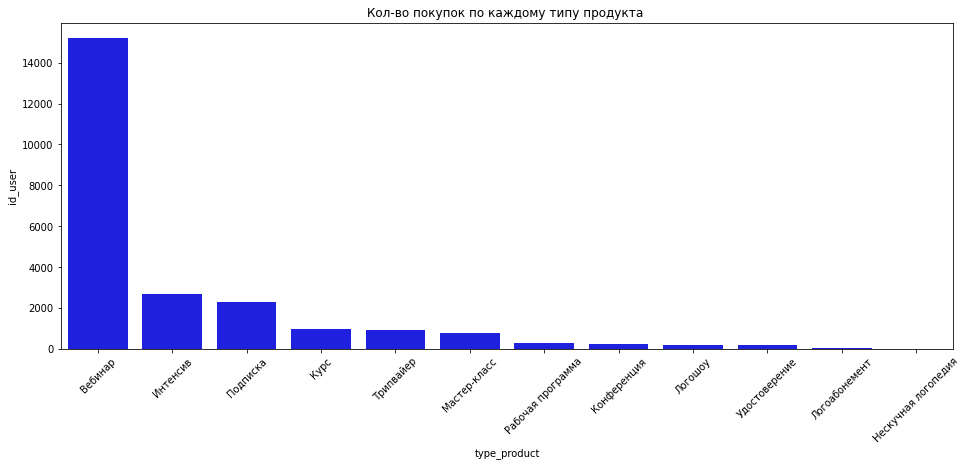

In [803]:
product_quantity = sales.groupby('type_product') \
                            .agg({'id_user':'count'}) \
                            .sort_values('id_user', ascending=False).reset_index()

plt.figure(figsize=(16, 6)) 
plt.xticks(rotation=45)
sns.barplot(data=product_quantity, x="type_product", y="id_user",color='blue')

plt.title('Кол-во покупок по каждому типу продукта ')

>**Комментарий**: *Существеннаяя доля покупок приходится на вебинары, интенсивы, подписку, далее — курс и трипвайер (поровну).*


#### 5.2 Распределение кол-ва покупок по году<a id="step_5_2"></a>

 [Вернуться в начало](#stepend)</n>

In [804]:
sales_trend = sales.copy()

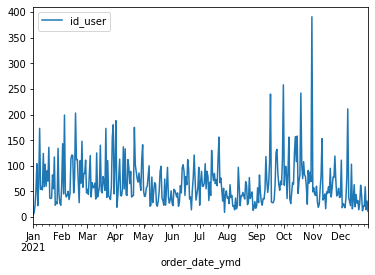

In [805]:
sales_trend_1 = sales_trend.groupby('order_date_ymd') \
                         .agg({'id_user':'count'})\
                         .plot()
                    

>**Комментарий**: *График получился очень шумный, и тут сложно что-то понять. Построим график со скольжением среднего с окном в 10*


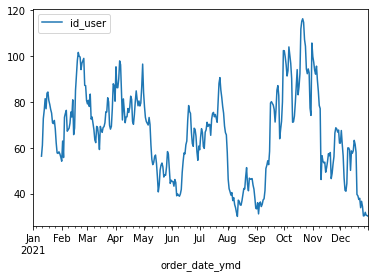

In [806]:
sales_trend_2 = sales_trend.groupby('order_date_ymd') \
                         .agg({'id_user':'count'}) \
                         .rolling(10).mean().plot()

>**Комментарий**: *Видно, что пик продаж по месяцыам приходится на середину-ближе к концу месяца. Далее провал до следующей середины месяца. Это скорее связано с тем, что аудитория чувствительна к цене и покупки планирует на период ближе к зарплате. К началу учебного сезонна - август-сентябрь спад продаж и конец года.*


#### 5.3 Кол-во покупок по на пользователя<a id="step_5_3"></a>

 [Вернуться в начало](#stepend)</n>

In [807]:
purchases = sales.copy()

In [808]:
purchases = purchases.groupby('sales_num').agg({'id_user':'count'}).reset_index()

<a id="point3"></a>

Text(0.5, 1.0, 'Кол-во покупок на пользователя')

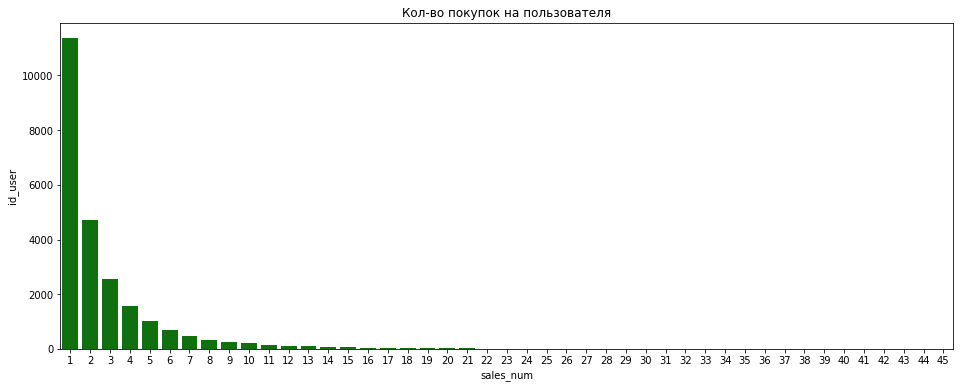

In [809]:
plt.figure(figsize=(16, 6)) 
sns.barplot(data=purchases, x="sales_num", y="id_user",color='green')
plt.title('Кол-во покупок на пользователя')

>**Комментарий**: *Стоит исходить из того, что большинство пользователей совершает не более 15 покупок*

#### 5.4 Среднее количество дней между покупками<a id="step_5_4"></a>


 [Вернуться в начало](#stepend)</n>

<a id="point4"></a>

In [810]:
avg_days = sales.copy()
avg_days = avg_days.groupby('cohort') \
                   .agg({'day_btw':['min','mean','median','max']}) \
                   .round(2) \
                   .reset_index()
avg_days

cohort day_btw                     
                min   mean median    max
0   2021-01     0.0  30.93    3.0  359.0
1   2021-02     0.0  26.32    2.0  330.0
2   2021-03     0.0  24.29    1.0  295.0
3   2021-04     0.0  22.94    0.0  256.0
4   2021-05     0.0  20.29    0.0  240.0
5   2021-06     0.0  15.62    0.0  183.0
6   2021-07     0.0  13.48    0.0  166.0
7   2021-08     0.0  11.17    0.0  127.0
8   2021-09     0.0   7.78    0.0  105.0
9   2021-10     0.0   4.87    0.0   88.0
10  2021-11     0.0   2.71    0.0   51.0
11  2021-12     0.0   0.84    0.0   21.0

>**Комментарий**: *Среднее кол-во дней между покупками снижается. Стоит обратить внимание на инструменты влияния на это. После когорты 4 произошло наиболе качественное изменение. Возможно это влючение большего числа инструментов в коммуникацию.*


#### 5.5 Найдем кол-во дней между покупками по когортам<a id="step_5_5"></a>

 [Вернуться в начало](#stepend)</n>

In [811]:
# Переменная с типом продукта, который нужно исключить из расчетов
exception_2 = 'Подписка'

In [812]:
 def day_between(x):
        
    days = x.copy()
    
    days = days.query('type_product !=@exception_2')
    
    days_1_2 = days.query('sales_num == "2"') \
               .groupby('cohort') \
               .agg({'day_btw':'mean'}) \
               .rename(columns={'day_btw':'btw_1_2'}) \
               .round(1)\
               .reset_index()
    
    days_2_3 = days.query('sales_num == "3"') \
               .groupby('cohort') \
               .agg({'day_btw':'mean'}) \
               .rename(columns={'day_btw':'btw_2_3'}) \
               .round(1)\
               .reset_index()
    
    days_3_4 = days.query('sales_num == "4"') \
               .groupby('cohort') \
               .agg({'day_btw':'mean'}) \
               .rename(columns={'day_btw':'btw_3_4'}) \
               .round(1)\
               .reset_index()
    
    days_4_5 = days.query('sales_num == "5"') \
               .groupby('cohort') \
               .agg({'day_btw':'mean'}) \
               .rename(columns={'day_btw':'btw_4_5'}) \
               .round(1)\
               .reset_index()
    
    days_5_6 = days.query('sales_num == "6"') \
               .groupby('cohort') \
               .agg({'day_btw':'mean'}) \
               .rename(columns={'day_btw':'btw_5_6'}) \
               .round(1)\
               .reset_index()
    
    days_6_7 = days.query('sales_num == "7"') \
               .groupby('cohort') \
               .agg({'day_btw':'mean'}) \
               .rename(columns={'day_btw':'btw_6_7'}) \
               .round(1)\
               .reset_index()
    
    days_btw_sales = days_1_2.merge(days_2_3, how='left', on='cohort')
    days_btw_sales = days_btw_sales.merge(days_3_4, how='left', on='cohort')
    days_btw_sales = days_btw_sales.merge(days_4_5, how='left', on='cohort')
    days_btw_sales = days_btw_sales.merge(days_5_6, how='left', on='cohort')
    days_btw_sales = days_btw_sales.merge(days_6_7, how='left', on='cohort')
    
    return days_btw_sales

<a id="point5"></a>

In [813]:
day_between(sales)

,cohort,btw_1_2,btw_2_3,btw_3_4,btw_4_5,btw_5_6,btw_6_7
0,2021-01,74.6,57.5,60.7,37.0,38.8,34.9
1,2021-02,62.7,53.2,43.9,41.1,36.9,48.2
2,2021-03,58.9,57.5,43.0,37.3,34.2,29.0
3,2021-04,62.6,50.8,35.6,38.6,29.1,30.8
4,2021-05,55.9,41.8,28.7,32.7,34.5,22.5
5,2021-06,46.9,32.4,23.2,30.3,16.7,24.8
6,2021-07,40.2,26.8,20.1,28.2,18.4,17.9
7,2021-08,34.9,21.7,15.9,17.0,11.1,10.8
8,2021-09,18.8,17.1,18.8,12.1,13.7,14.5
9,2021-10,15.6,13.9,10.9,10.7,9.6,6.1


>**Комментарий**: *Видно планомерное снижение дней между покупками — увеличение кол-ва инструментов коммуникации. Но на основе п.6 наблюдается вместе с этим и снижение среднего кол-ва купленных продуктов. При этом средний чек растет п.8*


### `6. Исследуем среднее кол-во покупок в каждой когорте и кол-во купленных продуктов по типам`
<a id="step6"></a>


 [Вернуться в начало](#stepend)</n>

#### 6.1 Среднее кол-во покупок по когортам<a id="step_6_1"></a>

 [Вернуться в начало](#stepend)</n>

<a id="point8"></a>

<a id="point6"></a>

In [814]:
exception_1 = 'Подписка'

avg_num_purchases = sales.copy()
avg_num_purchases = avg_num_purchases.query('type_product != @exception_1') \
                                     .groupby('cohort') \
                                     .agg({'sales_num':'mean'}) \
                                     .rename(columns={'sales_num':'avg_num'}) \
                                     .round() \
                                     .reset_index()
avg_num_purchases

,cohort,avg_num
0,2021-01,3.0
1,2021-02,3.0
2,2021-03,3.0
3,2021-04,2.0
4,2021-05,3.0
5,2021-06,2.0
6,2021-07,2.0
7,2021-08,2.0
8,2021-09,2.0
9,2021-10,2.0


>**Комментарий**: *Кол-во покупок снижается в каждой когортеб но это связано с возрастом когорты. Видно стабильное кол-во в 3 покупки*

#### 6.2 Исследуем кол-во купленных продуктов по типам по каждой когорте<a id="step_6_2"></a>

<a id="point9"></a>

 [Вернуться в начало](#stepend)</n>

<a id="point9"></a>

In [815]:
quantity_types_rangs = sales.copy()

quantity_types_rangs = quantity_types_rangs.query('sales_num <= 10') \
                                           .groupby(['sales_num','type_product']) \
                                           .agg({'id_user':'count'}) \
                                           .rename(columns={'id_user':'quantity'}) \
                                           .sort_values('quantity', ascending=False) \
                                           .reset_index()

quantity_types_rangs = quantity_types_rangs.pivot_table(index='type_product', columns='sales_num', values='quantity')
quantity_types_rangs = quantity_types_rangs.style.set_precision(1)
quantity_types_rangs.background_gradient(cmap='Blues') 

sales_num,1,2,3,4,5,6,7,8,9,10
type_product,,,,,,,,,,
Вебинар,7727.0,2886.0,1591.0,939.0,588.0,388.0,255.0,181.0,132.0,103.0
Интенсив,1788.0,392.0,185.0,100.0,71.0,45.0,22.0,25.0,14.0,16.0
Конференция,94.0,48.0,29.0,15.0,16.0,6.0,9.0,5.0,5.0,2.0
Курс,400.0,226.0,124.0,65.0,40.0,37.0,19.0,18.0,11.0,10.0
Логоабонемент,22.0,12.0,7.0,10.0,3.0,1.0,1.0,1.0,1.0,nan
Логошоу,114.0,30.0,16.0,14.0,11.0,3.0,5.0,3.0,4.0,1.0
Мастер-класс,317.0,204.0,96.0,63.0,36.0,26.0,14.0,11.0,10.0,6.0
Нескучная логопедия,2.0,1.0,2.0,nan,nan,nan,nan,nan,nan,nan
Подписка,299.0,653.0,365.0,240.0,176.0,136.0,104.0,70.0,69.0,57.0


>**Комментарий**: *От когорты и от номера покупки тренд не меняется, лидируют Вебинар, Интенсив, Курс, Подписка, Трипвайер. Покупательское поведение практические не изменилось. Второй покупкой наблюдается рост подписки - на втором месте и далее подписка лидирует после вебинара.


#### 6.3 Исследуем, сколько в среднем продуктов купит каждый пользователей в зависимости от первой покупки
<a id="step_6_3"></a>

 [Вернуться в начало](#stepend)</n>

In [816]:
def sales_сhain(x):
    purchases = x.copy()
    
    first_sale_wb = purchases.query('type_product == "Вебинар"').query('sales_num == "1"')
    first_sale_wb = first_sale_wb[['id_user','type_product']]
    first_sale_wb = first_sale_wb.rename(columns={'type_product':'first_sale'},inplace=False)
    all_sales_wb = first_sale_wb.merge(purchases, how='left', on='id_user')
    all_sales_wb = all_sales_wb[['cohort','id_user','type_product','sales_num','earn','first_sale']]
    all_sales_wb = all_sales_wb.groupby(['id_user','type_product']) \
                         .agg({'id_user':'count'}) \
                         .rename(columns={'id_user': '1_веб'}) \
                         .reset_index()
    all_sales_wb = all_sales_wb.groupby('type_product') \
                               .agg({'1_веб':'mean'}) \
                               .round(2) \
                               .reset_index()
    
    first_sale_int = purchases.query('type_product == "Интенсив"').query('sales_num == "1"')
    first_sale_int = first_sale_int[['id_user','type_product']]
    first_sale_int = first_sale_int.rename(columns={'type_product':'first_sale'},inplace=False)
    all_sales_int = first_sale_int.merge(purchases, how='left', on='id_user')
    all_sales_int = all_sales_int[['cohort','id_user','type_product','sales_num','earn','first_sale']]
    all_sales_int = all_sales_int.groupby(['id_user','type_product']) \
                                .agg({'id_user':'count'}) \
                                .rename(columns={'id_user': '1_инт'}) \
                                .reset_index()
    all_sales_int = all_sales_int.groupby('type_product') \
                                 .agg({'1_инт':'mean'}) \
                                 .round(2) \
                                 .reset_index()
    
    
    first_sale_course = purchases.query('type_product == "Курс"').query('sales_num == "1"')
    first_sale_course = first_sale_course[['id_user','type_product']]
    first_sale_course = first_sale_course.rename(columns={'type_product':'first_sale'},inplace=False)
    all_sales_course = first_sale_course.merge(purchases, how='left', on='id_user')
    all_sales_course = all_sales_course[['cohort','id_user','type_product','sales_num','earn','first_sale']]
    all_sales_course = all_sales_course.groupby(['id_user','type_product']) \
                                       .agg({'id_user':'count'}) \
                                       .rename(columns={'id_user': '1_курс'}) \
                                       .reset_index()
    all_sales_course = all_sales_course.groupby('type_product') \
                                      .agg({'1_курс':'mean'}) \
                                      .round(2) \
                                      .reset_index()
    
    first_sale_podpiska = purchases.query('type_product == "Подписка"').query('sales_num == "1"')
    first_sale_podpiska = first_sale_podpiska[['id_user','type_product']]
    first_sale_podpiska = first_sale_podpiska.rename(columns={'type_product':'first_sale'},inplace=False)
    all_sales_podpiska = first_sale_podpiska.merge(purchases, how='left', on='id_user')
    all_sales_podpiska = all_sales_podpiska[['cohort','id_user','type_product','sales_num','earn','first_sale']]
    all_sales_podpiska = all_sales_podpiska.groupby(['id_user','type_product']) \
                                           .agg({'id_user':'count'}) \
                                           .rename(columns={'id_user': '1_подп'}) \
                                           .reset_index()
    all_sales_podpiska = all_sales_podpiska.groupby('type_product') \
                                           .agg({'1_подп':'mean'}) \
                                           .round(2) \
                                           .reset_index()
    
    first_sale_mk = purchases.query('type_product == "Мастер-класс"').query('sales_num == "1"')
    first_sale_mk = first_sale_mk[['id_user','type_product']]
    first_sale_mk = first_sale_mk.rename(columns={'type_product':'first_sale'},inplace=False)
    all_sales_mk = first_sale_mk.merge(purchases, how='left', on='id_user')
    all_sales_mk = all_sales_mk[['cohort','id_user','type_product','sales_num','earn','first_sale']]
    all_sales_mk = all_sales_mk.groupby(['id_user','type_product']) \
                                           .agg({'id_user':'count'}) \
                                           .rename(columns={'id_user': '1_мк'}) \
                                           .reset_index()
    all_sales_mk = all_sales_mk.groupby('type_product') \
                                           .agg({'1_мк':'mean'}) \
                                           .round(2) \
                                           .reset_index()
    
    first_sale_wp = purchases.query('type_product == "Рабочая программа"').query('sales_num == "1"')
    first_sale_wp = first_sale_wp[['id_user','type_product']]
    first_sale_wp = first_sale_wp.rename(columns={'type_product':'first_sale'},inplace=False)
    all_sales_wp = first_sale_wp.merge(purchases, how='left', on='id_user')
    all_sales_wp = all_sales_wp[['cohort','id_user','type_product','sales_num','earn','first_sale']]
    all_sales_wp = all_sales_wp.groupby(['id_user','type_product']) \
                                           .agg({'id_user':'count'}) \
                                           .rename(columns={'id_user': '1_раб_прогр'}) \
                                           .reset_index()
    all_sales_wp = all_sales_wp.groupby('type_product') \
                                           .agg({'1_раб_прогр':'mean'}) \
                                           .round(2) \
                                           .reset_index()
     
    first_sale_tw = purchases.query('type_product == "Трипвайер"').query('sales_num == "1"')
    first_sale_tw = first_sale_tw[['id_user','type_product']]
    first_sale_tw = first_sale_tw.rename(columns={'type_product':'first_sale'},inplace=False)
    all_sales_tw = first_sale_tw.merge(purchases, how='left', on='id_user')
    all_sales_tw = all_sales_tw[['cohort','id_user','type_product','sales_num','earn','first_sale']]
    all_sales_tw = all_sales_tw.groupby(['id_user','type_product']) \
                                           .agg({'id_user':'count'}) \
                                           .rename(columns={'id_user': '1_трипвайер'}) \
                                           .reset_index()
    all_sales_tw = all_sales_tw.groupby('type_product') \
                                           .agg({'1_трипвайер':'mean'}) \
                                           .round(2) \
                                           .reset_index()
    
    first_sale_la = purchases.query('type_product == "Логоабонемент"').query('sales_num == "1"')
    first_sale_la = first_sale_la[['id_user','type_product']]
    first_sale_la = first_sale_la.rename(columns={'type_product':'first_sale'},inplace=False)
    all_sales_la = first_sale_la.merge(purchases, how='left', on='id_user')
    all_sales_la = all_sales_la[['cohort','id_user','type_product','sales_num','earn','first_sale']]
    all_sales_la = all_sales_la.groupby(['id_user','type_product']) \
                                           .agg({'id_user':'count'}) \
                                           .rename(columns={'id_user': '1_логоабон'}) \
                                           .reset_index()
    all_sales_la = all_sales_la.groupby('type_product') \
                                           .agg({'1_логоабон':'mean'}) \
                                           .round(2) \
                                           .reset_index()
    
    first_sale_ls = purchases.query('type_product == "Логошоу"').query('sales_num == "1"')
    first_sale_ls = first_sale_ls[['id_user','type_product']]
    first_sale_ls = first_sale_ls.rename(columns={'type_product':'first_sale'},inplace=False)
    all_sales_ls = first_sale_ls.merge(purchases, how='left', on='id_user')
    all_sales_ls = all_sales_ls[['cohort','id_user','type_product','sales_num','earn','first_sale']]
    all_sales_ls = all_sales_ls.groupby(['id_user','type_product']) \
                                           .agg({'id_user':'count'}) \
                                           .rename(columns={'id_user': '1_логошоу'}) \
                                           .reset_index()
    all_sales_ls = all_sales_ls.groupby('type_product') \
                                           .agg({'1_логошоу':'mean'}) \
                                           .round(2) \
                                           .reset_index()

    first_sale_сonf = purchases.query('type_product == "Конференция"').query('sales_num == "1"')
    first_sale_сonf = first_sale_сonf[['id_user','type_product']]
    first_sale_сonf = first_sale_сonf.rename(columns={'type_product':'first_sale'},inplace=False)
    all_sales_сonf = first_sale_сonf.merge(purchases, how='left', on='id_user')
    all_sales_сonf = all_sales_сonf[['cohort','id_user','type_product','sales_num','earn','first_sale']]
    all_sales_сonf = all_sales_сonf.groupby(['id_user','type_product']) \
                                           .agg({'id_user':'count'}) \
                                           .rename(columns={'id_user': '1_конф'}) \
                                           .reset_index()
    all_sales_сonf = all_sales_сonf.groupby('type_product') \
                                           .agg({'1_конф':'mean'}) \
                                           .round(2) \
                                           .reset_index()
    
    first_sale_udo = purchases.query('type_product == "Удостоверение"').query('sales_num == "1"')
    first_sale_udo = first_sale_udo[['id_user','type_product']]
    first_sale_udo = first_sale_udo.rename(columns={'type_product':'first_sale'},inplace=False)
    all_sales_udo = first_sale_udo.merge(purchases, how='left', on='id_user')
    all_sales_udo = all_sales_udo[['cohort','id_user','type_product','sales_num','earn','first_sale']]
    all_sales_udo = all_sales_udo.groupby(['id_user','type_product']) \
                                           .agg({'id_user':'count'}) \
                                           .rename(columns={'id_user': '1_удо'}) \
                                           .reset_index()
    all_sales_udo = all_sales_udo.groupby('type_product') \
                                           .agg({'1_удо':'mean'}) \
                                           .round(2) \
                                           .reset_index()
    
    first_sale_fun = purchases.query('type_product == "Нескучная логопедия"').query('sales_num == "1"')
    first_sale_fun = first_sale_fun[['id_user','type_product']]
    first_sale_fun = first_sale_fun.rename(columns={'type_product':'first_sale'},inplace=False)
    all_sales_fun = first_sale_fun.merge(purchases, how='left', on='id_user')
    all_sales_fun = all_sales_fun[['cohort','id_user','type_product','sales_num','earn','first_sale']]
    all_sales_fun = all_sales_fun.groupby(['id_user','type_product']) \
                                           .agg({'id_user':'count'}) \
                                           .rename(columns={'id_user': '1_неску'}) \
                                           .reset_index()
    all_sales_fun = all_sales_fun.groupby('type_product') \
                                           .agg({'1_неску':'mean'}) \
                                           .round(2) \
                                           .reset_index()
    
    all_sales_int = all_sales_int.merge(all_sales_wb, how='outer', on='type_product')
    all_sales_int = all_sales_int.merge(all_sales_course, how='outer', on='type_product')
    all_sales_int = all_sales_int.merge(all_sales_podpiska, how='outer', on='type_product')
    all_sales_int = all_sales_int.merge(all_sales_mk, how='outer', on='type_product')
    all_sales_int = all_sales_int.merge(all_sales_wp, how='outer', on='type_product')
    all_sales_int = all_sales_int.merge(all_sales_tw, how='outer', on='type_product')
    all_sales_int = all_sales_int.merge(all_sales_la, how='outer', on='type_product')
    all_sales_int = all_sales_int.merge(all_sales_ls, how='outer', on='type_product')
    all_sales_int = all_sales_int.merge(all_sales_сonf, how='outer', on='type_product')
    all_sales_int = all_sales_int.merge(all_sales_udo, how='outer', on='type_product')
    all_sales_int = all_sales_int.merge(all_sales_fun, how='outer', on='type_product')


    return all_sales_int.style.format({"1_инт": "{:20,.2f}", 
                                       "1_веб": "{:20,.2f}", 
                                       "1_курс": "{:20,.2f}", 
                                       "1_подп": "{:20,.2f}",
                                       "1_мк":"{:20,.2f}",
                                       "1_раб_прогр":"{:20,.2f}",
                                       "1_трипвайер":"{:20,.2f}",
                                       "1_раб_прогр": "{:20,.2f}", 
                                       "1_логоабон": "{:20,.2f}", 
                                       "1_логошоу": "{:20,.2f}",
                                       "1_конф":"{:20,.2f}",
                                       "1_удо":"{:20,.2f}",
                                       "1_неску":"{:20,.2f}"})\
                              .background_gradient(cmap='Blues')

<a id="point12"></a>

In [869]:
sales_сhain(sales)

,type_product,1_инт,1_веб,1_курс,1_подп,1_мк,1_раб_прогр,1_трипвайер,1_логоабон,1_логошоу,1_конф,1_удо,1_неску
0,Вебинар,2.19,1.72,2.02,2.04,2.45,1.64,2.17,1.40,2.15,1.83,nan,1.00
1,Интенсив,1.12,1.18,1.35,1.21,1.46,1.60,1.18,1.33,1.64,1.17,nan,nan
2,Конференция,1.08,1.01,1.00,1.08,1.00,1.00,1.00,nan,nan,1.01,nan,nan
3,Курс,1.26,1.12,1.09,1.13,1.33,1.00,1.14,1.00,1.39,1.43,nan,2.00
4,Логоабонемент,1.00,1.00,1.00,1.25,1.00,nan,1.00,1.05,1.00,nan,nan,nan
5,Логошоу,1.08,1.06,1.29,1.00,1.25,nan,1.00,nan,1.05,1.00,nan,nan
6,Мастер-класс,1.04,1.07,1.04,1.00,1.05,1.00,1.05,1.00,1.00,1.00,nan,1.00
7,Нескучная логопедия,1.00,nan,1.00,nan,nan,nan,nan,nan,nan,1.00,nan,1.00
8,Подписка,2.34,1.93,2.36,1.80,2.67,3.00,1.94,1.00,2.75,3.00,nan,nan
9,Рабочая программа,1.04,1.01,1.00,1.00,1.00,1.01,1.00,1.00,1.00,1.00,nan,nan


>**Комментарий**: *Получается, что если первой покупокой у нас:*
 * Интенсив, то после него хорошо покупают Вебинар, Подписку, Курс
 * Вебинар, то после него хорошо покупают Подписку, Вебинар, Интенсив
 * Курс, то после него хорошо покупают Подписку, Вебинар, Интенсив
 * Подписка, то после нее хорошо покупают Вебинар, Подписку, Логоабонемент
 * Мастер-класс, то после него хорошо покупают Подписку, Вебинар, Интенсив
 * Рабочая программа, то после нее хорошо покупают Подписку, Вебинар, Интенсив
 * Трипвайер, то после него хорошо покупают Вебинар, Подписку, Интенсив
 * Логоабонемент, то после него хорошо покупают Вебинар, Интенсив, Логоабонемент
 * Логошоу, то после него хорошо покупают Подписку, Вебинар, Интенсив
 * Конференция, то после нее хорошо покупают Подписку, Вебинар, Курс

>**Комментарий**: *Лучше всего покупают после:*
 * После Вебинара больше всего покупают - Мастер-класс
 * После Интенсива больше всего покупают - Логошоу
 * После Конференции больше всего покупают - Интенсив и Подписка
 * После Курса больше всего покупают - Конференция
 * После Логоабонемента больше всего покупают - Подписка
 * После Логошоу больше всего покупают - Мастер-класс
 * После Мастер-класса больше всего покупают - Вебинар
 * После Подписки больше всего покупают - Конференция и Рабочая программа
 * После Рабочей программы больше всего покупают - Вебинар
 * После Трипвайера больше всего покупают - Вебинар
 * После Удостоверения больше всего покупают - Вебинар



>**Комментарий**: *Следует более подробно изучить цепочку конверсий, но сейчас видно, что стартовые продукты, как Рабочая программа и Трипвайер судя по всему хорошо конвертят на Вебинар. Тут все нормально. Вебинар хорошо конвертит на Подписку и Интенсив. Интенсив в свою очередь на Курс. А вот в Мастер-классе наблюдается сбой. Мастер-класс конвертит хорошо на продукты ниже уровнем - на подписку и вебинар. Следует посмотреть, есть ли разница по выручке в зависимости от первой продажи. Также цепочку конверсии можно изучить в п 10.5.1*


#### 6.4 Исследуем, конверсию до 11 покупки в зависимости от первой покупки<a id="step_6_4"></a>

 [Вернуться в начало](#stepend)</n>

In [818]:
first_product = "Трипвайер"

In [819]:
def conv_way(x):
    webinar_1 = sales.copy()
    webinar_1 = sales.query('type_product == @first_product') \
                     .query('sales_num == 1')
    webinar_1 = webinar_1[['id_user']]
    webinar_2 = webinar_1.merge(sales, how='left', on='id_user')
    webinar_2 = webinar_2.query('sales_num == 2')
    webinar_2 = webinar_2.groupby('type_product') \
                         .agg({'order_date':'count'}) \
                         .rename(columns={'order_date': 'num_2'}) \
                         .reset_index()
    webinar_2 = webinar_2.assign(c1 = webinar_1.id_user.count())
    webinar_2['c_2'] = (webinar_2.num_2 / webinar_2.c1 * 100).round(2)
    webinar_2 = webinar_2[['type_product','c_2']]
    
    webinar_3 = webinar_1.merge(sales, how='left', on='id_user')
    webinar_3 = webinar_3.query('sales_num == 3')
    webinar_3 = webinar_3.groupby('type_product') \
                         .agg({'order_date':'count'}) \
                         .rename(columns={'order_date': 'num_3'}) \
                         .reset_index()
    webinar_3 = webinar_3.assign(c1 = webinar_1.id_user.count())
    webinar_3['c_3'] = (webinar_3.num_3 / webinar_3.c1 * 100).round(2)
    webinar_3 = webinar_3[['type_product','c_3']]
    
    webinar_4 = webinar_1.merge(sales, how='left', on='id_user')
    webinar_4 = webinar_4.query('sales_num == 4')
    webinar_4 = webinar_4.groupby('type_product') \
                         .agg({'order_date':'count'}) \
                         .rename(columns={'order_date': 'num_4'}) \
                         .reset_index()
    webinar_4 = webinar_4.assign(c1 = webinar_1.id_user.count())
    webinar_4['c_4'] = (webinar_4.num_4 / webinar_4.c1 * 100).round(2)
    webinar_4 = webinar_4[['type_product','c_4']]
    
    webinar_5 = webinar_1.merge(sales, how='left', on='id_user')
    webinar_5 = webinar_5.query('sales_num == 5')
    webinar_5 = webinar_5.groupby('type_product') \
                         .agg({'order_date':'count'}) \
                         .rename(columns={'order_date': 'num_5'}) \
                         .reset_index()
    webinar_5 = webinar_5.assign(c1 = webinar_1.id_user.count())
    webinar_5['c_5'] = (webinar_5.num_5 / webinar_5.c1 * 100).round(2)
    webinar_5 = webinar_5[['type_product','c_5']]
    
    webinar_6 = webinar_1.merge(sales, how='left', on='id_user')
    webinar_6 = webinar_6.query('sales_num == 6')
    webinar_6 = webinar_6.groupby('type_product') \
                         .agg({'order_date':'count'}) \
                         .rename(columns={'order_date': 'num_6'}) \
                         .reset_index()
    webinar_6 = webinar_6.assign(c1 = webinar_1.id_user.count())
    webinar_6['c_6'] = (webinar_6.num_6 / webinar_6.c1 * 100).round(2)
    webinar_6 = webinar_6[['type_product','c_6']]
    
    webinar_7 = webinar_1.merge(sales, how='left', on='id_user')
    webinar_7 = webinar_7.query('sales_num == 7')
    webinar_7 = webinar_7.groupby('type_product') \
                         .agg({'order_date':'count'}) \
                         .rename(columns={'order_date': 'num_7'}) \
                         .reset_index()
    webinar_7 = webinar_7.assign(c1 = webinar_1.id_user.count())
    webinar_7['c_7'] = (webinar_7.num_7 / webinar_7.c1 * 100).round(2)
    webinar_7 = webinar_7[['type_product','c_7']]
    
    webinar_8 = webinar_1.merge(sales, how='left', on='id_user')
    webinar_8 = webinar_8.query('sales_num == 8')
    webinar_8 = webinar_8.groupby('type_product') \
                         .agg({'order_date':'count'}) \
                         .rename(columns={'order_date': 'num_8'}) \
                         .reset_index()
    webinar_8 = webinar_8.assign(c1 = webinar_1.id_user.count())
    webinar_8['c_8'] = (webinar_8.num_8 / webinar_8.c1 * 100).round(2)
    webinar_8 = webinar_8[['type_product','c_8']]
    
    webinar_9 = webinar_1.merge(sales, how='left', on='id_user')
    webinar_9 = webinar_9.query('sales_num == 9')
    webinar_9 = webinar_9.groupby('type_product') \
                         .agg({'order_date':'count'}) \
                         .rename(columns={'order_date': 'num_9'}) \
                         .reset_index()
    webinar_9 = webinar_9.assign(c1 = webinar_1.id_user.count())
    webinar_9['c_9'] = (webinar_9.num_9 / webinar_9.c1 * 100).round(2)
    webinar_9 = webinar_9[['type_product','c_9']]
    
    webinar_10 = webinar_1.merge(sales, how='left', on='id_user')
    webinar_10 = webinar_10.query('sales_num == 10')
    webinar_10 = webinar_10.groupby('type_product') \
                         .agg({'order_date':'count'}) \
                         .rename(columns={'order_date': 'num_10'}) \
                         .reset_index()
    webinar_10 = webinar_10.assign(c1 = webinar_1.id_user.count())
    webinar_10['c_10'] = (webinar_10.num_10 / webinar_10.c1 * 100).round(2)
    webinar_10 = webinar_10[['type_product','c_10']]
    
    webinar_11 = webinar_1.merge(sales, how='left', on='id_user')
    webinar_11 = webinar_11.query('sales_num == 11')
    webinar_11 = webinar_11.groupby('type_product') \
                         .agg({'order_date':'count'}) \
                         .rename(columns={'order_date': 'num_11'}) \
                         .reset_index()
    webinar_11 = webinar_11.assign(c1 = webinar_1.id_user.count())
    webinar_11['c_11'] = (webinar_11.num_11 / webinar_11.c1 * 100).round(2)
    webinar_11 = webinar_11[['type_product','c_11']]
    
    webinar_2 = webinar_2.merge(webinar_3, how='left', on='type_product')
    webinar_2 = webinar_2.merge(webinar_4, how='left', on='type_product')
    webinar_2 = webinar_2.merge(webinar_5, how='left', on='type_product')
    webinar_2 = webinar_2.merge(webinar_6, how='left', on='type_product')
    webinar_2 = webinar_2.merge(webinar_7, how='left', on='type_product')
    webinar_2 = webinar_2.merge(webinar_8, how='left', on='type_product')
    webinar_2 = webinar_2.merge(webinar_9, how='left', on='type_product')
    webinar_2 = webinar_2.merge(webinar_10, how='left', on='type_product')
    webinar_2 = webinar_2.merge(webinar_11, how='left', on='type_product')
    
    print('Конверсии по очередности покупок, если первая покупка:', first_product)
    return webinar_2.style.format({"c_2": "{:3,.1f}%",
                                   "c_3": "{:3,.1f}%",
                                   "c_4": "{:3,.1f}%",
                                   "c_5": "{:3,.1f}%",
                                   "c_6": "{:3,.1f}%",
                                   "c_7": "{:3,.1f}%",
                                   "c_8": "{:3,.1f}%",
                                   "c_9": "{:3,.1f}%",
                                   "c_10": "{:3,.1f}%",
                                   "c_11": "{:3,.1f}%"}) \
                           .background_gradient(cmap='Blues')


<a id="point11"></a>

In [820]:
conv_way(sales)

Конверсии по очередности покупок, если первая покупка: Трипвайер


,type_product,c_2,c_3,c_4,c_5,c_6,c_7,c_8,c_9,c_10,c_11
0,Вебинар,16.8%,7.7%,4.0%,3.2%,2.6%,1.3%,0.8%,0.8%,0.8%,0.6%
1,Интенсив,4.9%,1.5%,0.2%,0.4%,0.8%,0.2%,nan%,0.2%,nan%,nan%
2,Конференция,0.2%,0.2%,0.2%,nan%,nan%,nan%,nan%,nan%,0.2%,nan%
3,Курс,0.8%,1.1%,0.6%,0.2%,nan%,0.2%,0.2%,nan%,nan%,nan%
4,Логоабонемент,0.2%,nan%,nan%,nan%,nan%,nan%,nan%,nan%,nan%,nan%
5,Мастер-класс,1.3%,0.4%,1.7%,0.4%,0.2%,nan%,nan%,0.2%,nan%,nan%
6,Подписка,1.1%,1.5%,1.3%,0.8%,0.2%,0.4%,0.2%,0.2%,0.2%,0.2%
7,Рабочая программа,0.4%,nan%,0.2%,nan%,nan%,nan%,nan%,nan%,nan%,nan%
8,Трипвайер,0.4%,nan%,nan%,0.2%,nan%,nan%,0.2%,nan%,nan%,nan%


### `7. Исследуем среднюю стоимость каждого типа продукта`<a id="step7"></a>


 [Вернуться в начало](#stepend)</n>

In [821]:
avg_price = sales.copy()

avg_price = avg_price.groupby('type_product') \
                     .agg({'earn':'mean'}) \
                     .rename(columns={'earn':'avg_price'}) \
                     .round(2).reset_index() 

avg_price.style.format({"avg_price": "{:20,.1f} руб."}).background_gradient(cmap='Blues')

,type_product,avg_price
0,Вебинар,318.5 руб.
1,Интенсив,"1,619.8 руб."
2,Конференция,"4,837.1 руб."
3,Курс,"4,536.4 руб."
4,Логоабонемент,"2,683.7 руб."
5,Логошоу,"3,148.4 руб."
6,Мастер-класс,497.2 руб.
7,Нескучная логопедия,"4,390.5 руб."
8,Подписка,"1,126.1 руб."
9,Рабочая программа,"1,623.7 руб."


### `8. Исследуем средний чек`<a id="step8"></a>


 [Вернуться в начало](#stepend)</n>

#### 8.1 Найдем средний чек по всему порталу<a id="step_8_1"></a>

 [Вернуться в начало](#stepend)</n>

In [822]:
print('Средний чек с подпиской',sales.earn.mean().round(2),"руб.")
print('Средний чек без подписки',sales.query('type_product !="Подписка"').earn.mean().round(2),"руб.")

Средний чек с подпиской 819.08 руб.
Средний чек без подписки 786.08 руб.


#### 8.2 Исследуем средний чек по когортам<a id="step_8_2"></a>

 [Вернуться в начало](#stepend)</n>

<a id="point7"></a>

In [823]:
average_check = sales.copy()
average_check = average_check.groupby('cohort') \
                             .agg({'earn':'mean'}) \
                             .rename(columns={'earn':'avg'}) \
                             .round() \
                             .reset_index()
purchases = sales.copy()
purchases = purchases.groupby('cohort') \
                     .agg({'order_date_ymd':'count'}) \
                     .rename(columns={'order_date_ymd':'number_orders'}) \
                     .round() \
                     .reset_index()

revenue = sales.copy()

revenue_all = revenue.groupby('cohort') \
                 .agg({'earn':'sum'}) \
                 .rename(columns={'earn':'revenue_all'}) \
                 .round() \
                 .reset_index()

revenue_s = revenue.query('type_product != "Подписка"') \
                   .groupby('cohort') \
                   .agg({'earn':'sum'}) \
                   .rename(columns={'earn':'revenue_no_subs'}) \
                   .round() \
                   .reset_index()

subs = revenue.query('type_product == "Подписка"') \
                   .groupby('cohort') \
                   .agg({'earn':'sum'}) \
                   .rename(columns={'earn':'revenue_subs'}) \
                   .round() \
                   .reset_index()


average_check = pd.merge(average_check, purchases, how='left', on='cohort')
average_check = average_check.merge(revenue_all, how='left', on='cohort')
average_check = average_check.merge(revenue_s, how='left', on='cohort')
average_check = average_check.merge(subs, how='left', on='cohort')


average_check['per_cent_no_subs'] = ((average_check.revenue_no_subs / average_check.revenue_all) * 100).round(2) 
average_check


,cohort,avg,number_orders,revenue_all,revenue_no_subs,revenue_subs,per_cent_no_subs
0,2021-01,689.0,3924,2703382.0,2223997.0,479385.0,82.27
1,2021-02,705.0,3664,2582938.0,2025152.0,557786.0,78.40
2,2021-03,864.0,3075,2656481.0,2248641.0,407840.0,84.65
3,2021-04,810.0,2556,2069902.0,1857944.0,211958.0,89.76
4,2021-05,934.0,1653,1543416.0,1376302.0,167114.0,89.17
5,2021-06,807.0,1670,1348396.0,1153441.0,194955.0,85.54
6,2021-07,772.0,1813,1400281.0,1192204.0,208077.0,85.14
7,2021-08,996.0,898,894176.0,777024.0,117152.0,86.90
8,2021-09,827.0,1674,1384066.0,1247296.0,136770.0,90.12
9,2021-10,854.0,1668,1423684.0,1351625.0,72059.0,94.94


>**Комментарий**: *Наблюдается снижение доли подписки в выручке*


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 <a list of 12 Text major ticklabel objects>)

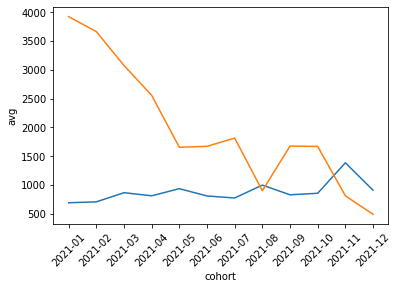

In [824]:
avg_graphic = average_check.copy()
avg_graphic['cohort'] = avg_graphic['cohort'].apply(str)
sns.lineplot(data=avg_graphic, x="cohort", y="avg")
plt.xticks(rotation=45)
sns.lineplot(data=avg_graphic, x="cohort", y="number_orders")
plt.xticks(rotation=45)



([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 <a list of 12 Text major ticklabel objects>)

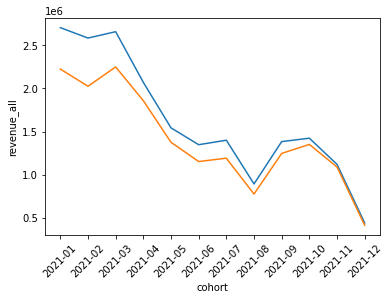

In [825]:
sns.lineplot(data=avg_graphic, x="cohort", y="revenue_all")
plt.xticks(rotation=45)
sns.lineplot(data=avg_graphic, x="cohort", y="revenue_no_subs")
plt.xticks(rotation=45)

>**Комментарий**: *В 2021-11 когорте увеличение среднего чека, при это кол-во покупок почти минимально (3_е с конца). Скорее это говорит о стимулирующих мероприятиях/вводу новых продуктов. Но главное - вероятнее всего спрос сильно эластичен и было повышение цен


#### 8.3 Исследуем средний чек в зависимости от номера покупки с подпиской и без<a id="step_8_3"></a>

 [Вернуться в начало](#stepend)</n>

In [826]:
def avg_purchase(x):
    avg_purchase_s = x.copy()
    avg_purchase_s = avg_purchase_s.query('sales_num <= 48') \
                           .groupby(['sales_num']) \
                           .agg({'earn':'mean'}) \
                           .rename(columns={'earn':'avg_all'}) \
                           .sort_values('sales_num', ascending=True) \
                           .round(2) \
                           .reset_index()
    
    avg_purchase = x.copy()
    avg_purchase = avg_purchase.query('type_product != "Подписка"')
    avg_purchase = avg_purchase.query('sales_num <= 48') \
                           .groupby(['sales_num']) \
                           .agg({'earn':'mean'}) \
                           .rename(columns={'earn':'avg_no_subs'}) \
                           .sort_values('sales_num', ascending=True) \
                           .round(2) \
                           .reset_index()
    
    avg_purchase = avg_purchase.merge(avg_purchase_s, how="left", on="sales_num")
    
    avg_purchase = avg_purchase[['sales_num','avg_all','avg_no_subs']]
    
    return avg_purchase.style.format({"avg_all": "{:20,.1f} руб.",
                                      "avg_no_subs": "{:20,.1f} руб."}) \
                             .background_gradient(subset=['avg_all','avg_no_subs'],cmap='Blues')
                             #.background_gradient(subset='avg_purchase', cmap='Blues')

<a id="point13"></a>


In [827]:
avg_purchase(sales)

,sales_num,avg_all,avg_no_subs
0,1,779.0 руб.,757.1 руб.
1,2,804.6 руб.,781.3 руб.
2,3,862.8 руб.,822.6 руб.
3,4,835.8 руб.,788.1 руб.
4,5,889.2 руб.,825.6 руб.
5,6,824.9 руб.,818.8 руб.
6,7,910.7 руб.,774.9 руб.
7,8,963.9 руб.,978.4 руб.
8,9,939.3 руб.,925.5 руб.
9,10,"1,203.1 руб.","1,257.9 руб."


>**Комментарий**: *Видно, что рост средней стоимости покупки наблюдается на 11,12,13,16,17,26,30 покупки*


#### 8.4 Исследуем размер среднего чека по когортам в покупках под номерами 11,12,13,16,17,26,30 <a id="step_8_4"></a>


 [Вернуться в начало](#stepend)</n>

In [828]:
def avg_sales_specific(x):
    step_1 = x.copy()
    step_2 = step_1.query('sales_num == [9,10,11,12,13,15,16,17,26,30]') \
                 .groupby(['cohort','sales_num']) \
                 .agg({'earn':'mean'}) \
                 .round()
    end = step_2.pivot_table(index='cohort', columns='sales_num', values='earn')
    
    return end

In [829]:
avg_sales_specific(sales)

sales_num,9,10,11,12,13,15,16,17,26,30
cohort,,,,,,,,,,
2021-01,845.0,623.0,772.0,1265.0,811.0,895.0,695.0,590.0,1930.0,4876.0
2021-02,807.0,980.0,813.0,901.0,1189.0,405.0,1245.0,1415.0,282.0,477.0
2021-03,988.0,1305.0,1139.0,1065.0,922.0,650.0,545.0,619.0,NaN,NaN
2021-04,1104.0,1106.0,1484.0,1488.0,1734.0,347.0,1159.0,5447.0,NaN,NaN
2021-05,1278.0,1136.0,485.0,600.0,475.0,1419.0,1375.0,1121.0,NaN,NaN
2021-06,1066.0,750.0,2211.0,727.0,1106.0,702.0,4496.0,280.0,NaN,NaN
2021-07,1050.0,408.0,614.0,774.0,528.0,282.0,282.0,4143.0,NaN,NaN
2021-08,574.0,1052.0,1304.0,5296.0,528.0,548.0,676.0,7695.0,NaN,NaN
2021-09,398.0,2527.0,3139.0,974.0,6991.0,NaN,NaN,NaN,NaN,NaN


#### 8.5 Исследуем средний чек в первых 20 покупках<a id="step_8_5"></a> 

 [Вернуться в начало](#stepend)</n>

In [830]:
exception_2 = 'Подписка'


In [831]:
def avg_sales(x):
    step_1 = x.copy()
    # step_1 = step_1.query('type_product ==@exception_2')
    step_2 = step_1.query('sales_num <= 20').groupby(['cohort','sales_num']).agg({'earn':'mean'}).reset_index() \
                   .groupby(['cohort','sales_num']) \
                   .agg({'earn':'mean'}) \
                   .round()
    end = step_2.pivot_table(index='cohort', columns='sales_num', values='earn')
    
    return end

<a id="point14"></a>

In [832]:
avg_sales(sales)

sales_num,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
cohort,,,,,,,,,,,,,,,,,,,,
2021-01,640.0,672.0,686.0,744.0,825.0,660.0,792.0,816.0,845.0,623.0,772.0,1265.0,811.0,502.0,895.0,695.0,590.0,707.0,528.0,538.0
2021-02,631.0,646.0,807.0,804.0,829.0,744.0,883.0,837.0,807.0,980.0,813.0,901.0,1189.0,545.0,405.0,1245.0,1415.0,693.0,454.0,1064.0
2021-03,782.0,856.0,962.0,819.0,1024.0,1025.0,1012.0,765.0,988.0,1305.0,1139.0,1065.0,922.0,1519.0,650.0,545.0,619.0,1211.0,674.0,380.0
2021-04,806.0,814.0,778.0,691.0,867.0,597.0,893.0,627.0,1104.0,1106.0,1484.0,1488.0,1734.0,326.0,347.0,1159.0,5447.0,380.0,2036.0,974.0
2021-05,979.0,896.0,770.0,1106.0,943.0,886.0,1047.0,679.0,1278.0,1136.0,485.0,600.0,475.0,685.0,1419.0,1375.0,1121.0,356.0,380.0,380.0
2021-06,657.0,798.0,903.0,859.0,1045.0,976.0,904.0,2517.0,1066.0,750.0,2211.0,727.0,1106.0,2095.0,702.0,4496.0,280.0,472.0,376.0,376.0
2021-07,687.0,881.0,795.0,836.0,807.0,1064.0,896.0,859.0,1050.0,408.0,614.0,774.0,528.0,632.0,282.0,282.0,4143.0,NaN,NaN,NaN
2021-08,1000.0,879.0,1008.0,1019.0,816.0,1172.0,889.0,1049.0,574.0,1052.0,1304.0,5296.0,528.0,548.0,548.0,676.0,7695.0,NaN,NaN,NaN
2021-09,773.0,839.0,1029.0,712.0,788.0,815.0,1294.0,578.0,398.0,2527.0,3139.0,974.0,6991.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


>**Комментарий**: *Стоит обратить внимание на когорту 2021-11 со средним чеком в 13741 - подозрительный всплеск c продуктом подписка. И в когорте 2021-12 вторая покупка стоит посмотреть на механику и покупателей - также рост* В остальном средний чек практически на одном уровне по всем когортам.


#### 8.6 Исследуем, за счет чего такой высокий средний чек в когорте<a id="step_8_6"></a>

 [Вернуться в начало](#stepend)</n>

In [833]:
cohort_max = sales.copy()
cohort_max['cohort'] = cohort_max['cohort'].dt.strftime('%Y-%m')
cohort_max = cohort_max.query('cohort == "2021-11"').query('sales_num==[8,10]')
cohort_max = cohort_max.query("earn >= 10000")
cohort_max

,cohort,id_user,reg_date,order_date,sales_num,type_product,earn,day_reg,day_btw,order_date_ymd
4293,2021-11,82366640,2021-11-12 00:00:00,2021-12-24 12:00:14,8,Курс,21762.6,42,1.0,2021-12-24
23258,2021-11,208035682,2021-11-02 00:00:00,2021-12-20 18:15:43,10,Курс,47694.4,48,3.0,2021-12-20


>**Комментарий**: *Это не выброс, просто покупка дорого продукта. Стоит поговорить с этими клиентами, выявить триггеры и драйверы покупки. Это хороший сигнал, так как такое больше никогда не повторялось. Причем наблюдается это именно в одной когорте. Это единичный случай, но его следует исследовать*


### `9. Исследуем конверсию в первую покупку`<a id="step9"></a>

 [Вернуться в начало](#stepend)</n>

>**Комментарий**: *Конверсию буду считать по когортам, на основе данных GA и CRM. Исключив тем самым, чтобы в конверсию попали еще более "старые" пользователи, смешав тем самым показатели*


#### 9.1 Найдем конверсию в первую покупку по когортам, суммарно, без разделения на продукты<a id="step_9_1"></a>

 [Вернуться в начало](#stepend)</n>

<a id="point15"></a>


In [834]:
costs_1 = costs.copy()
costs_1["date"] = costs_1["date"].apply(pd.to_datetime)
costs_1['date'] = costs_1['date'].dt.to_period('M')
costs_1 = costs_1.rename(columns={'date':'cohort'})

In [835]:
conv_global = sales.copy()
conv_global = conv_global.query('sales_num == "1"') \
                         .groupby('cohort') \
                         .agg({'id_user':'count'}) \
                         .reset_index()
costs_1 = costs.copy()
costs_1["date"] = costs_1["date"].apply(pd.to_datetime)
costs_1['date'] = costs_1['date'].dt.to_period('M')
costs_1 = costs_1.rename(columns={'date':'cohort'})



conv_global = conv_global.merge(costs_1, how='left', on='cohort')
conv_global['c1_all'] = ((conv_global.id_user / conv_global.new_users) * 100).round(2)
conv_global = conv_global[['cohort','c1_all']]

conv_global_s = sales.copy()
conv_global_s = conv_global_s.query('type_product != "Подписка"') \
                             .query('sales_num == "1"') \
                             .groupby('cohort') \
                             .agg({'id_user':'count'}) \
                             .reset_index()
conv_global_s = conv_global_s.merge(costs_1, how='left', on='cohort')
conv_global_s['c1_s'] = ( (conv_global_s.id_user / conv_global_s.new_users) * 100).round(2)
conv_global_s = conv_global_s[['cohort','c1_s']]

conv_global = conv_global.merge(conv_global_s, how='left', on='cohort')
conv_global

,cohort,c1_all,c1_s
0,2021-01,1.33,1.28
1,2021-02,1.21,1.16
2,2021-03,0.92,0.90
3,2021-04,1.03,1.01
4,2021-05,0.72,0.70
5,2021-06,0.85,0.84
6,2021-07,1.13,1.11
7,2021-08,0.47,0.45
8,2021-09,0.70,0.69
9,2021-10,0.73,0.72


In [836]:
print('Средняя конверсия по порталу',conv_global.c1_all.mean().round(2))
print('Медианная конверсия по порталу',conv_global.c1_all.median().round(2))
print('Средняя конверсия по порталу (без подписки)',conv_global.c1_s.mean().round(2))
print('Медианная конверсия по порталу (без подписки)',conv_global.c1_s.median().round(2))

Средняя конверсия по порталу 0.82
Медианная конверсия по порталу 0.79
Средняя конверсия по порталу (без подписки) 0.8
Медианная конверсия по порталу (без подписки) 0.78


>**Комментарий**: *Видно отрицательный тренд конверсии в первую покупку. Стоит изучить когорты 4 и 7 - для сравнения взаимодействий с этими когортами и остальными для выявления мехник или действий повлекших такой результат.*


9.1.1 Создадим таблицу с конверсией в первую покупку по когортам и по типу продукта

In [837]:
buyers_main = sales.copy()

buyers_main = buyers_main.query('sales_num == "1"') \
                         .groupby(['cohort','type_product']) \
                         .agg({'id_user':'count'}) \
                         .reset_index()

buyers_main = buyers_main.merge(costs_1, how='left', on='cohort')

buyers_main['c_1'] = ((buyers_main.id_user / buyers_main.new_users) * 100).round(2)

buyers_main = buyers_main[['cohort','type_product','new_users','c_1']]

#### 9.2 Найдем конверсию в первую покупку по продуктам и когортам<a id="step_9_2"></a>

 [Вернуться в начало](#stepend)</n>

<a id="point16"></a>

In [838]:
conv_products = sales.copy()
conv_products = conv_products.query('sales_num == "1"') \
                             .groupby(['cohort','type_product']) \
                             .agg({'id_user':'count'}) \
                             .reset_index()
conv_products = conv_products.merge(costs_1, how='left', on='cohort')
conv_products['c_1'] = ((conv_products.id_user / conv_products.new_users) * 100).round(2)
conv_products = conv_products.pivot_table(index='cohort', columns='type_product', values='c_1')
conv_products

type_product,Вебинар,Интенсив,Конференция,Курс,Логоабонемент,Логошоу,Мастер-класс,Нескучная логопедия,Подписка,Рабочая программа,Трипвайер
cohort,,,,,,,,,,,
2021-01,0.91,0.28,NaN,0.04,NaN,NaN,0.02,NaN,0.05,NaN,0.02
2021-02,0.90,0.20,NaN,0.02,NaN,NaN,0.03,NaN,0.06,0.00,0.01
2021-03,0.64,0.16,NaN,0.02,NaN,0.06,0.01,NaN,0.03,0.00,0.01
2021-04,0.65,0.17,NaN,0.04,0.00,0.01,0.10,0.0,0.02,0.00,0.02
2021-05,0.46,0.12,NaN,0.05,0.02,0.01,0.02,NaN,0.01,0.00,0.02
2021-06,0.67,0.13,NaN,0.02,0.00,0.00,0.01,NaN,0.01,NaN,0.00
2021-07,0.89,0.09,NaN,0.05,NaN,NaN,0.02,NaN,0.02,0.06,0.00
2021-08,0.30,0.06,NaN,0.03,0.00,0.00,0.01,NaN,0.02,0.04,0.00
2021-09,0.43,0.10,0.01,0.01,NaN,0.00,0.02,NaN,0.01,0.02,0.09


>**Комментарий**: *Наибоее конверсионные продукты — Вебинар, Интенсив, Курс. Именно они лидируют среди первых покупок*


#### 9.3 Найдем конверсию в первую и последующие покупки в без разделения на продукты и когорты
<a id="step_9_3"></a>

 [Вернуться в начало](#stepend)</n>

In [839]:
def sales_global(x):
    costs_sale = costs.copy()
    costs_sale = costs_1[['cohort', 'new_users']]
  
    x = x.copy() 
    sales = x
    sales['cohort'] = sales['order_date'].dt.to_period('M')
    
    sale_1 = sales.query('sales_num == "1"') \
                   .groupby('cohort') \
                   .agg({'id_user':'count'}) \
                   .rename(columns={'id_user':'first_sale'}) \
                   .reset_index()
    
    costs_sale = costs_sale.merge(sale_1, how='left', on='cohort')
    costs_sale['c_1'] = ((costs_sale.first_sale / costs_sale.new_users) * 100).round(2)
        
    sale_1 = sale_1.first_sale.mean().round()
    
    sale_2 = sales.query('sales_num == "2"') \
                   .groupby('cohort') \
                   .agg({'id_user':'count'}) \
                   .rename(columns={'id_user':'second_sale'}) \
                   .reset_index()
    sale_2 = sale_2.second_sale.mean().round()
    
    sale_3 = sales.query('sales_num == "3"') \
                   .groupby('cohort') \
                   .agg({'id_user':'count'}) \
                   .rename(columns={'id_user':'third_sale'}) \
                   .reset_index()
    sale_3 = sale_3.third_sale.mean().round()
    
    sale_4 = sales.query('sales_num == "4"') \
                   .groupby('cohort') \
                   .agg({'id_user':'count'}) \
                   .rename(columns={'id_user':'fourth_sale'}) \
                   .reset_index()
    sale_4 = sale_4.fourth_sale.mean().round()
    
    sale_5 = sales.query('sales_num == "5"') \
                   .groupby('cohort') \
                   .agg({'id_user':'count'}) \
                   .rename(columns={'id_user':'fifth_sale'}) \
                   .reset_index()
    sale_5 = sale_5.fifth_sale.mean().round()
    
    sale_6 = sales.query('sales_num == "6"') \
                   .groupby('cohort') \
                   .agg({'id_user':'count'}) \
                   .rename(columns={'id_user':'six_sale'}) \
                   .reset_index()
    sale_6 = sale_6.six_sale.mean().round()
    
    sale_7 = sales.query('sales_num == "7"') \
                   .groupby('cohort') \
                   .agg({'id_user':'count'}) \
                   .rename(columns={'id_user':'seven_sale'}) \
                   .reset_index()
    sale_7 = sale_7.seven_sale.mean().round()
    
    print('Конверсия в первую покупку',costs_sale.c_1.mean().round(2),"%" )
    print('Конверсия во вторую покупку', ((sale_2 / costs_sale.new_users.sum()) * 100).round(2),"%")
    print('Конверсия в третью покупку',((sale_3 / costs_sale.new_users.sum()) * 100).round(2),"%")
    print('Конверсия в четвертую покупку',((sale_4 / costs_sale.new_users.sum()) * 100).round(2),"%")
    print('Конверсия в пятую покупку',((sale_5 / costs_sale.new_users.sum()) * 100).round(2),"%")
    print('Конверсия в шестую покупку',((sale_6 / costs_sale.new_users.sum()) * 100).round(3),"%")    
    print('Конверсия в седьмую покупку',((sale_7 / costs_sale.new_users.sum()) * 100).round(3),"%") 

In [840]:
sales_global(sales)

Конверсия в первую покупку 0.82 %
Конверсия во вторую покупку 0.03 %
Конверсия в третью покупку 0.02 %
Конверсия в четвертую покупку 0.01 %
Конверсия в пятую покупку 0.01 %
Конверсия в шестую покупку 0.004 %
Конверсия в седьмую покупку 0.003 %


#### 9.4 Сведем в одну таблицу конверсии и кол-во дней между покупками<a id="step_9_4"></a>

[Вернуться в начало](#stepend)</n>

In [841]:
def sales_cohorts(x):
    sales = x.copy()
    costs_sale = costs.copy()
    costs_sale = costs_1[['cohort', 'new_users']]
    
    sales['cohort'] = sales['order_date'].dt.to_period('M')
    
    sale_1 = sales.query('sales_num == "1"') \
              .groupby('cohort') \
              .agg({'id_user':'count'}) \
              .rename(columns={'id_user':'first_sale'}) \
              .reset_index()
    
    sale_2 = sales.query('sales_num == "2"') \
              .groupby('cohort') \
              .agg({'id_user':'count'}) \
              .rename(columns={'id_user':'second_sale'}) \
              .reset_index()
    
    sale_3 = sales.query('sales_num == "3"') \
              .groupby('cohort') \
              .agg({'id_user':'count'}) \
              .rename(columns={'id_user':'third_sale'}) \
              .reset_index()
    
    sale_4 = sales.query('sales_num == "4"') \
              .groupby('cohort') \
              .agg({'id_user':'count'}) \
              .rename(columns={'id_user':'fourth_sale'}) \
              .reset_index()
    
    sale_5 = sales.query('sales_num == "5"') \
              .groupby('cohort') \
              .agg({'id_user':'count'}) \
              .rename(columns={'id_user':'fifth_sale'}) \
              .reset_index()
    
    sale_6 = sales.query('sales_num == "6"') \
              .groupby('cohort') \
              .agg({'id_user':'count'}) \
              .rename(columns={'id_user':'six_sale'}) \
              .reset_index()
    
    sale_7 = sales.query('sales_num == "7"') \
              .groupby('cohort') \
              .agg({'id_user':'count'}) \
              .rename(columns={'id_user':'seven_sale'}) \
              .reset_index()
    
    sales_cohort = costs_sale.merge(sale_1, how='left', on='cohort')
    sales_cohort = sales_cohort.merge(sale_2, how='left', on='cohort')
    sales_cohort = sales_cohort.merge(sale_3, how='left', on='cohort')
    sales_cohort = sales_cohort.merge(sale_4, how='left', on='cohort')
    sales_cohort = sales_cohort.merge(sale_5, how='left', on='cohort')
    sales_cohort = sales_cohort.merge(sale_6, how='left', on='cohort')
    sales_cohort = sales_cohort.merge(sale_7, how='left', on='cohort')
    
    sales_cohort['c_1'] = ((sales_cohort.first_sale / sales_cohort.new_users) * 100).round(2)
    sales_cohort['c_2'] = ((sales_cohort.second_sale / sales_cohort.new_users) * 100).round(2)
    sales_cohort['c_3'] = ((sales_cohort.third_sale / sales_cohort.new_users) * 100).round(2)
    sales_cohort['c_4'] = ((sales_cohort.fourth_sale / sales_cohort .new_users) * 100).round(2)
    sales_cohort['c_5'] = ((sales_cohort.fifth_sale / sales_cohort.new_users) * 100).round(2)
    sales_cohort['c_6'] = ((sales_cohort.six_sale / sales_cohort.new_users) * 100).round(2)
    sales_cohort['c_7'] = ((sales_cohort.seven_sale / sales_cohort.new_users) * 100).round(2)
    
    sales_cohort = sales_cohort[['cohort','c_1','c_2','c_3','c_4','c_5','c_6','c_7']]
    
    x = x.copy()
    
    days = x
    
    days_1_2 = days.query('sales_num == "2"') \
               .groupby('cohort') \
               .agg({'day_btw':'mean'}) \
               .rename(columns={'day_btw':'btw_1_2'}) \
               .round(1)\
               .reset_index()
    
    days_2_3 = days.query('sales_num == "3"') \
               .groupby('cohort') \
               .agg({'day_btw':'mean'}) \
               .rename(columns={'day_btw':'btw_2_3'}) \
               .round(1)\
               .reset_index()
    
    days_3_4 = days.query('sales_num == "4"') \
               .groupby('cohort') \
               .agg({'day_btw':'mean'}) \
               .rename(columns={'day_btw':'btw_3_4'}) \
               .round(1)\
               .reset_index()
    
    days_4_5 = days.query('sales_num == "5"') \
               .groupby('cohort') \
               .agg({'day_btw':'mean'}) \
               .rename(columns={'day_btw':'btw_4_5'}) \
               .round(1)\
               .reset_index()
    
    days_5_6 = days.query('sales_num == "6"') \
               .groupby('cohort') \
               .agg({'day_btw':'mean'}) \
               .rename(columns={'day_btw':'btw_5_6'}) \
               .round(1)\
               .reset_index()
    
    days_6_7 = days.query('sales_num == "7"') \
               .groupby('cohort') \
               .agg({'day_btw':'mean'}) \
               .rename(columns={'day_btw':'btw_6_7'}) \
               .round(1)\
               .reset_index()
    
    days_btw_sales = days_1_2.merge(days_2_3, how='left', on='cohort')
    days_btw_sales = days_btw_sales.merge(days_3_4, how='left', on='cohort')
    days_btw_sales = days_btw_sales.merge(days_4_5, how='left', on='cohort')
    days_btw_sales = days_btw_sales.merge(days_5_6, how='left', on='cohort')
    days_btw_sales = days_btw_sales.merge(days_6_7, how='left', on='cohort')
    
    sales_cohort = sales_cohort.merge(days_btw_sales, how='left', on='cohort')
    sales_cohort = sales_cohort[['cohort','c_1','btw_1_2','c_2','btw_2_3','c_3','btw_3_4','c_4','btw_4_5','c_5','btw_5_6','c_6','btw_6_7','c_7']]
    
    print('Конверсии в покупку по когортам')
    print()
    print('Показатели конверсии в первую покупку')
    print()
    print('Минимальная конверсия в первую покупку',sales_cohort.c_1.min().round(2))
    print('Средняя конверсия в первую покупку',sales_cohort.c_1.mean().round(2))
    print('Медианная конверсия в первую покупку',sales_cohort.c_1.median().round(2))
    print('Максимальная конверсия в первую покупку',sales_cohort.c_1.max().round(2))
    print()
    print('Показатели конверсии во вторую покупку')
    print()
    print('Минимальная конверсия во вторую покупку',sales_cohort.c_2.min().round(2))
    print('Средняя конверсия во вторую покупку',sales_cohort.c_2.mean().round(2))
    print('Медианная конверсия во вторую покупку',sales_cohort.c_2.median().round(2))
    print('Максимальная конверсия во вторую покупку',sales_cohort.c_2.max().round(2))
    print()
    print('Показатели конверсии в третью покупку')
    print()
    print('Минимальная конверсия в третью покупку',sales_cohort.c_3.min().round(2))
    print('Средняя конверсия в третью покупку',sales_cohort.c_3.mean().round(2))
    print('Медианная конверсия в третью покупку',sales_cohort.c_2.median().round(2))
    print('Максимальная конверсия в третью покупку',sales_cohort.c_3.max().round(2))
    print()
    print('Показатели конверсии в четвертую покупку')
    print()
    print('Минимальная конверсия в четвертую покупку',sales_cohort.c_4.min().round(2))
    print('Средняя конверсия в четвертую покупку',sales_cohort.c_4.mean().round(2))
    print('Медианная конверсия в четвертую покупку',sales_cohort.c_2.mean().round(2))
    print('Максимальная конверсия в четвертую покупку',sales_cohort.c_4.max().round(2))
    print()
    print('Показатели конверсии в пятую покупку')
    print()
    print('Минимальная конверсия в пятую покупку',sales_cohort.c_5.min().round(2))
    print('Средняя конверсия в пятую покупку',sales_cohort.c_5.mean().round(2))
    print('Медианная конверсия в пятую покупку',sales_cohort.c_5.mean().round(2))
    print('Максимальная конверсия в пятую покупку',sales_cohort.c_5.max().round(2))
    print()
    print('Показатели конверсии в шестую покупку')
    print()
    print('Минимальная конверсия в шестую покупку',sales_cohort.c_6.min().round(2))
    print('Средняя конверсия в шестую покупку',sales_cohort.c_6.mean().round(2))
    print('Медианная конверсия в шестую покупку',sales_cohort.c_6.mean().round(2))
    print('Максимальная конверсия в шестую покупку',sales_cohort.c_6.max().round(2))
    
    return sales_cohort.style.format({"c_1": "{:20,.1f}%", 
                                      "c_2": "{:20,.1f}%", 
                                      "c_3": "{:20,.1f}%", 
                                      "c_4": "{:20,.1f}%",
                                      "c_5":"{:20,.1f}%",
                                      "c_6":"{:20,.1f}%",
                                      "c_7":"{:20,.1f}%",
                                      "btw_1_2": "{:20,.0f}", 
                                      "btw_2_3": "{:20,.0f}", 
                                      "btw_3_4": "{:20,.0f}",
                                      "btw_4_5":"{:20,.0f}",
                                      "btw_5_6":"{:20,.0f}",
                                      "btw_6_7":"{:20,.0f}"})\
                              .background_gradient(cmap='Blues')

In [842]:
sales_cohorts(sales)

Конверсии в покупку по когортам

Показатели конверсии в первую покупку

Минимальная конверсия в первую покупку 0.33
Средняя конверсия в первую покупку 0.82
Медианная конверсия в первую покупку 0.79
Максимальная конверсия в первую покупку 1.33

Показатели конверсии во вторую покупку

Минимальная конверсия во вторую покупку 0.17
Средняя конверсия во вторую покупку 0.34
Медианная конверсия во вторую покупку 0.36
Максимальная конверсия во вторую покупку 0.51

Показатели конверсии в третью покупку

Минимальная конверсия в третью покупку 0.07
Средняя конверсия в третью покупку 0.18
Медианная конверсия в третью покупку 0.36
Максимальная конверсия в третью покупку 0.32

Показатели конверсии в четвертую покупку

Минимальная конверсия в четвертую покупку 0.02
Средняя конверсия в четвертую покупку 0.11
Медианная конверсия в четвертую покупку 0.34
Максимальная конверсия в четвертую покупку 0.21

Показатели конверсии в пятую покупку

Минимальная конверсия в пятую покупку 0.01
Средняя конверсия в пя

,cohort,c_1,btw_1_2,c_2,btw_2_3,c_3,btw_3_4,c_4,btw_4_5,c_5,btw_5_6,c_6,btw_6_7,c_7
0,2021-01,1.3%,68,0.3%,52,0.1%,58,0.0%,36,0.0%,36,0.0%,33,0.0%
1,2021-02,1.2%,54,0.4%,48,0.2%,40,0.1%,38,0.0%,38,0.0%,43,0.0%
2,2021-03,0.9%,49,0.4%,52,0.2%,40,0.1%,34,0.1%,32,0.0%,29,0.0%
3,2021-04,1.0%,57,0.4%,47,0.2%,33,0.1%,36,0.1%,30,0.0%,30,0.0%
4,2021-05,0.7%,51,0.3%,40,0.2%,27,0.1%,30,0.1%,33,0.1%,22,0.0%
5,2021-06,0.8%,39,0.4%,30,0.2%,23,0.1%,30,0.1%,19,0.1%,25,0.0%
6,2021-07,1.1%,34,0.5%,26,0.3%,20,0.2%,27,0.1%,20,0.1%,20,0.1%
7,2021-08,0.5%,28,0.3%,22,0.2%,16,0.1%,18,0.1%,13,0.1%,13,0.0%
8,2021-09,0.7%,18,0.3%,18,0.2%,18,0.1%,14,0.1%,16,0.1%,18,0.0%
9,2021-10,0.7%,16,0.4%,14,0.2%,12,0.2%,11,0.1%,10,0.1%,9,0.1%


#### 9.5. Рассчитаем конверсию во вторую и последующие покупки по когортам и комбинации продуктов
<a id="step_9_5"></a>

 [Вернуться в начало](#stepend)</n>

>**Комментарий**: *Создадим функцию, в которую будем подавать переменные с типом продукта и смотреть комбинацию конверсии по этим типам продуктам*


9.5.1 Создадим переменные по типу продукта и по номеру покупки

In [843]:
# Укажите первую покупку (меняем только название, кавычки оставляем)
first_sale = 'Подписка'
# Укажите вторую покупку (меняем только название, кавычки оставляем)
second_sale = 'Вебинар'
# Укажите третью покупку (меняем только название, кавычки оставляем)
third_sale = 'Вебинар'
# Укажите четвертую покупку (меняем только название, кавычки оставляем)
fourth_sale = 'Курс'
# Ниже не менять показатели без необходимости
second_rang = '2'
third_rang = '3'
fourth_rang = '4'

In [844]:
def sales_conv(x):
    x = x.copy()
    conversion = x
    conversion['cohort'] = conversion['order_date'].dt.to_period('M')
    
    buyers_1 = buyers_main.query('type_product==@first_sale')
    buyers_1 = buyers_1[['cohort','new_users','c_1']]    
    
    second_sale = conversion.query('type_product == @second_sale') \
                    .query('sales_num == @second_rang') \
                    .groupby('cohort') \
                    .agg({'id_user':'count'}) \
                    .rename(columns={'id_user':'second_sale'}) \
                    .reset_index()
    
    third_sale = conversion.query('type_product == @third_sale') \
                    .query('sales_num == @third_rang') \
                    .groupby('cohort') \
                    .agg({'id_user':'count'}) \
                    .rename(columns={'id_user':'third_sale'}) \
                    .reset_index()
    
    fourth_sale = conversion.query('type_product == @fourth_sale') \
                    .query('sales_num == @fourth_rang') \
                    .groupby('cohort') \
                    .agg({'id_user':'count'}) \
                    .rename(columns={'id_user':'fourth_sale'}) \
                    .reset_index()
    
    first_sale = buyers_1.merge(second_sale, how='left', on='cohort')
    first_sale = first_sale.merge(third_sale, how='left', on='cohort')
    first_sale = first_sale.merge(fourth_sale, how='left', on='cohort')
    
    first_sale['c_2'] = ((first_sale.second_sale / first_sale.new_users) * 100).round(3)
    first_sale['c_3'] = ((first_sale.third_sale / first_sale.new_users) * 100).round(3)
    first_sale['c_4'] = ((first_sale.fourth_sale / first_sale.new_users) * 100).round(3)
    
    first_sale = first_sale[['cohort', 'c_1','c_2','c_3','c_4']]
    
    print('Конверсии в покупку продуктов указанных в п.10.5.1')
    print('Средняя конверсия в первую покупку',first_sale.c_1.mean().round(2))
    print('Средняя конверсия во вторую покупку',first_sale.c_2.mean().round(2))
    print('Средняя конверсия в третью покупку',first_sale.c_3.mean().round(2))
    print('Средняя конверсия в четвертую покупку',first_sale.c_4.mean().round(2))
    
    return first_sale.fillna(0).style.format({"c_1": "{:20,.2f}%",
                                              "c_2": "{:20,.2f}%", 
                                              "c_3": "{:20,.2f}%", 
                                              "c_4": "{:20,.2f}%"})\
                               .background_gradient(cmap='Blues')

    
    

<a id="point10"></a>

In [845]:
sales_conv(sales)

Конверсии в покупку продуктов указанных в п.10.5.1
Средняя конверсия в первую покупку 0.02
Средняя конверсия во вторую покупку 0.21
Средняя конверсия в третью покупку 0.12
Средняя конверсия в четвертую покупку 0.01


,cohort,c_1,c_2,c_3,c_4
0,2021-01,0.05%,0.16%,0.04%,0.00%
1,2021-02,0.06%,0.28%,0.11%,0.00%
2,2021-03,0.03%,0.20%,0.09%,0.00%
3,2021-04,0.02%,0.26%,0.13%,0.00%
4,2021-05,0.01%,0.19%,0.12%,0.01%
5,2021-06,0.01%,0.25%,0.14%,0.00%
6,2021-07,0.02%,0.34%,0.23%,0.01%
7,2021-08,0.02%,0.14%,0.09%,0.01%
8,2021-09,0.01%,0.19%,0.11%,0.00%
9,2021-10,0.01%,0.25%,0.16%,0.00%


### `10. Исследуем подписку`<a id="step10"></a>    

 [Вернуться в начало](#stepend)</n>

#### 10.1 Исследуем, сколько покупок подписок приходится на каждый номер покупки<a id="step_10_1"></a>

 [Вернуться в начало](#stepend)</n>

In [846]:
def subscription_num(x):
    subscription_num = x.copy()
    subscription_num['cohort']=subscription_num['cohort'].dt.strftime('%Y-%m')
    subscription_num = subscription_num.query('type_product=="Подписка"')
    subscription_num = subscription_num.groupby('sales_num') \
                                       .agg({'order_date':'count'}) \
                                       .rename(columns={'order_date':'quantity'}) \
                                       .sort_values('quantity', ascending=False) \
                                       .reset_index()
    return subscription_num

In [847]:
subscription_num(sales)

,sales_num,quantity
0,2,653
1,3,365
2,1,299
3,4,240
4,5,176
5,6,136
6,7,104
7,8,70
8,9,69
9,10,57


>**Комментарий**: *Наиболее часто подписку покупают 2,3 и 1 покупкой соответсвенно, в порядке убывания*


#### 10.2 Выделим среди подписок три тарифа<a id="step_10_2"></a>

 [Вернуться в начало](#stepend)</n>

10.2.1 Создадим отдельные таблицы для пользователей с подпиской и без

In [848]:
subs = sales.copy()
subs_users = subs.query('type_product =="Подписка"')
subs_users = subs_users[['id_user','order_date']]
subs_users = subs_users.merge(sales, on=['id_user','order_date'])

In [849]:
subs_no_users = subs.query('type_product != "Подписка"')
subs_no_users = subs_no_users[['id_user','order_date']]
subs_no_users = subs_no_users.merge(sales, on=['id_user','order_date'])

>**Комментарий**: *subs_users - покупатели с подпиской, subs_no_users - покупатели без подписки*


10.2.2 Выделим подписчиков премиумной подписки и создадим отдельный датафрейм с первой покупкой подписки

In [850]:
premiun_subs = subs_users.query('type_product == "Подписка"') \
                         .query('earn > 8000') \
                         .sort_values('earn', ascending=False) \
                         .reset_index()
premiun_subs['subs_num'] = premiun_subs.groupby(['id_user'])['order_date'].cumcount () +1
premiun_first = premiun_subs.query('subs_num =="1"')
premiun_subs_cohort = premiun_subs.groupby('cohort') \
                                  .agg({'id_user':'count'}) \
                                  .rename(columns={'id_user':'quantity'}) \
                                  .reset_index()
  
premiun_subs_cohort

,cohort,quantity
0,2021-01,10
1,2021-02,14
2,2021-03,9
3,2021-04,6
4,2021-05,5
5,2021-06,3
6,2021-07,6
7,2021-08,2
8,2021-09,2
9,2021-10,2


In [851]:
print('В среднем, какой по счету покупкой яв-ся премиумная подписка', premiun_subs.sales_num.mean().round(2))
print('Среднее кол-во покупок премиумного тарифа', premiun_subs.subs_num.mean().round(2))

В среднем, какой по счету покупкой яв-ся премиумная подписка 3.68
Среднее кол-во покупок премиумного тарифа 1.0


10.2.3 Выделим подписчиков среднего тарифа подписки и создадим отдельный датафрейм с первой покупкой подписки

In [852]:
middle_subs = subs_users.query('type_product == "Подписка"') \
                        .query('earn < 8000') \
                        .query('earn > 1000') \
                        .sort_values('earn', ascending=False) \
                        .reset_index()

middle_subs['subs_num'] = middle_subs.groupby(['id_user'])['order_date'].cumcount () +1
middle_first = middle_subs.query('subs_num =="1"')
middle_subs_cohort = middle_subs.groupby('cohort') \
                                .agg({'id_user':'count'}) \
                                .rename(columns={'id_user':'quantity'}) \
                                .reset_index()
middle_subs_cohort

,cohort,quantity
0,2021-01,7
1,2021-02,10
2,2021-03,2
3,2021-04,1
4,2021-05,2
5,2021-06,6
6,2021-07,2
7,2021-08,1
8,2021-09,8
9,2021-10,1


In [853]:
print('Среднее кол-во покупок среднего тарифа', middle_subs.subs_num.mean().round(2))

Среднее кол-во покупок среднего тарифа 1.02


10.2.4 Выделим подписчиков начального тарифа подписки и создадим отдельный датафрейм с первой покупкой подписки

In [854]:
easy_subs = subs_users.query('type_product == "Подписка"') \
                      .query('earn < 1000') \
                      .sort_values('earn', ascending=False).reset_index()
easy_subs['subs_num'] = easy_subs.groupby(['id_user'])['order_date'].cumcount () +1
easy_first = easy_subs.query('subs_num =="1"')
easy_subs_cohort = easy_subs.groupby('cohort') \
                            .agg({'id_user':'count'}) \
                            .rename(columns={'id_user':'quantity'}) \
                            .reset_index()

In [855]:
print('Среднее кол-во покупок начального тарифа', easy_subs.subs_num.mean().round(2))

Среднее кол-во покупок начального тарифа 2.47


In [856]:
easy_subs_cohort

,cohort,quantity
0,2021-01,420
1,2021-02,465
2,2021-03,389
3,2021-04,194
4,2021-05,145
5,2021-06,168
6,2021-07,180
7,2021-08,111
8,2021-09,84
9,2021-10,46


#### 10.3 Создадим таблицу, где только подписка<a id="step_10_3"></a>

 [Вернуться в начало](#stepend)</n>

In [857]:
clients = orders.merge(reg, how='left', on='id_user')
subscription = clients.copy()
subscription= subscription.groupby(['id_user','reg_date', 'order_date','type_product','earn']).agg({'id_order':'count'}).reset_index()
subscription = subscription.query('type_product =="Подписка"')
subscription ['sales_num'] = subscription .groupby(['id_user'])['order_date'].cumcount () +1
subscription  = subscription [['id_user','reg_date','order_date','type_product','earn','sales_num']]
subscription ['order_date'] = subscription ['order_date'].apply(pd.to_datetime )
subscription ['day_reg'] = subscription .groupby('id_user')['order_date'].apply(lambda x: x.dt.date - x.min().date())
subscription ['order_date_ymd'] = subscription ['order_date'].dt.to_period('D')
subscription ['day_btw'] = subscription .groupby('id_user')['order_date_ymd'].diff() / np.timedelta64(1, 'D')
subscription ['day_btw'] = subscription ['day_btw'].fillna(0)
subscription ['day_reg'] = pd.to_numeric(subscription ['day_reg'].dt.days)
subscription ['earn'] = subscription ['earn'].str.replace(',', '.')
subscription ['earn'] = subscription ['earn'].astype (float)
first_sub = subscription.copy()
first_sub = first_sub.query('sales_num=="1"')
first_sub = first_sub.groupby('id_user')['order_date'].min().reset_index()
first_sub = first_sub.rename(columns={'order_date': 'first_sale_date'}) 
first_sub ['cohort'] = first_sub['first_sale_date'].dt.to_period('M')
first_sub = first_sub [['id_user','cohort']]
subscription = subscription .merge(first_sub , how='left', on='id_user')
subscription = subscription [['cohort','id_user','reg_date','order_date','sales_num','type_product',
                              'earn','day_reg','day_btw','order_date_ymd']]
subscription

,cohort,id_user,reg_date,order_date,sales_num,type_product,earn,day_reg,day_btw,order_date_ymd
0,2021-03,24684469,2021-03-21 00:00:00,2021-03-22 13:24:59,1,Подписка,563.88,0,0.0,2021-03-22
1,2021-01,24702100,2021-01-05 00:00:00,2021-01-14 18:15:47,1,Подписка,944.83,0,0.0,2021-01-14
2,2021-02,24748824,2021-02-13 00:00:00,2021-02-14 15:54:23,1,Подписка,470.45,0,0.0,2021-02-14
3,2021-02,24748824,2021-02-13 00:00:00,2021-04-01 18:52:31,2,Подписка,656.15,46,46.0,2021-04-01
4,2021-02,24751106,2021-02-17 00:00:00,2021-02-17 18:24:33,1,Подписка,573.40,0,0.0,2021-02-17
...,...,...,...,...,...,...,...,...,...,...
2314,2021-12,216130578,2021-12-04 11:32:35,2021-12-06 07:19:58,1,Подписка,973.03,0,0.0,2021-12-06
2315,2021-12,216591582,2021-12-06 12:51:02,2021-12-27 16:58:53,1,Подписка,6817.20,0,0.0,2021-12-27
2316,2021-12,217191057,2021-12-08 18:14:11,2021-12-11 11:58:40,1,Подписка,973.03,0,0.0,2021-12-11
2317,2021-12,217268763,2021-12-09 00:09:34,2021-12-09 16:27:21,1,Подписка,973.03,0,0.0,2021-12-09


#### 10.4 Исследуем конверсию в следующую подписку<a id="step_10_4"></a>

 [Вернуться в начало](#stepend)</n>

10.4.1 Создадим функцию, считающую конверсию по каждому тарифу подписки и дни между подписками

In [858]:
def subscription_variants(x):
    subscription = x.groupby('subs_num') \
                    .agg({'id_user':'count'}) \
                    .reset_index()
    
    subscription['percentage'] = ((subscription['id_user'] / subscription['id_user'].shift(1)) * 100).round(2)
    
    subscription_1 = x.copy()
    subscription_1 = subscription_1.groupby('subs_num') \
                                   .agg({'day_btw':'mean'}) \
                                   .rename(columns={'day_btw':'day_between'}) \
                                   .sort_values('day_between', ascending=True) \
                                   .round(1) \
                                   .reset_index()
    subscription = subscription.merge(subscription_1, how='left', on='subs_num')

   
      
    return subscription.style.format({"percentage": "{:20,.1f}%", 
                                      "day_between": "{:20,.0f} days"})\
                             .background_gradient(subset='percentage')

<a id="point13"></a>


In [859]:
subscription_variants(easy_subs)

,subs_num,id_user,percentage,day_between
0,1,1120,nan%,12 days
1,2,411,36.7%,21 days
2,3,206,50.1%,25 days
3,4,137,66.5%,22 days
4,5,103,75.2%,21 days
5,6,76,73.8%,19 days
6,7,52,68.4%,21 days
7,8,35,67.3%,26 days
8,9,28,80.0%,23 days
9,10,24,85.7%,20 days


In [870]:
subscription_variants(premiun_subs)

,subs_num,id_user,percentage,day_between
0,1,62,nan%,22 days


In [861]:
subscription_variants(middle_subs)

,subs_num,id_user,percentage,day_between
0,1,41,nan%,36 days
1,2,1,2.4%,216 days


#### 10.5 Сравнение среднего чего клиента с подпиской и без<a id="step_10_5"></a>

 [Вернуться в начало](#stepend)</n>

In [862]:
print('Средний размер покупки клиента с подпиской', subs_users.earn.mean().round(2))
print('Максимальный размер покупки клиента с подпиской', subs_users.earn.max())
print()
print('Средний размер покупки клиента без подписки', subs_no_users.earn.mean().round(2))
print('Максимальный размер покупки клиента без подписки', subs_no_users.earn.max())

Средний размер покупки клиента с подпиской 1126.08
Максимальный размер покупки клиента с подпиской 16557.0

Средний размер покупки клиента без подписки 786.08
Максимальный размер покупки клиента без подписки 47694.4


- Добавить сколько приносит пользователь в зависимости от первой покупки
- Сколько мы тратим на пользователя пока он с нами

### `11. Когортный анализ`<a id="step11"></a>

 [Вернуться в начало](#stepend)</n>

#### 11.1 Retention<a id="step_11_1"></a>

 [Вернуться в начало](#stepend)</n>

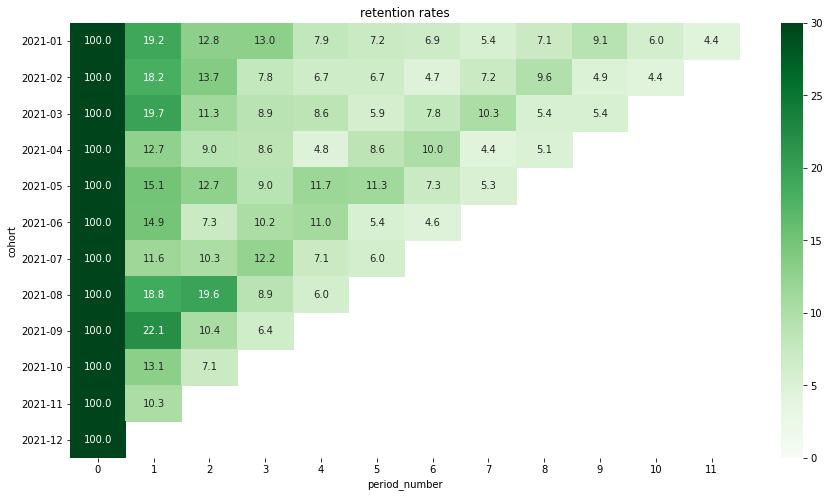

In [863]:
cohort = orders.merge(reg, how='left', on='id_user')
cohort['order_m'] = cohort['order_date']
cohort['reg_m'] = cohort['reg_date']
cohort['order_date'] = cohort['order_date'].apply(pd.to_datetime )
cohort['reg_date'] = cohort['reg_date'].apply(pd.to_datetime )
cohort['id_user'] = cohort['id_user'].astype(str)
cohort['id_order'] = cohort['id_order'].astype(str)
cohort['earn'] = cohort['earn'].str.replace(',', '.')
cohort['earn'] = cohort['earn'].astype(float)

# Создадим датаферейм с датой первой покупки для каждого пользователя
client_first_date = cohort.groupby('id_user')['order_date'].min().reset_index()
# Переименуем колонку
client_first_date = client_first_date.rename(columns={'order_date': 'first_sale_date'}) 

cohort = cohort.merge(client_first_date, how= 'left', on ='id_user')

# Создадим колонки с датой покупки и датой первой покупки в формате год-месяц
cohort['y_m_sale'] = cohort['order_date'].dt.to_period('M')
cohort['cohort'] = cohort['first_sale_date'].dt.to_period('M')

# Сформируем таблицу для когортного анализа
cohort_retention = cohort.copy()
cohort_revenue = cohort.copy()
cohort_retention = cohort_retention[['id_user', 'id_order', 'order_date']]
cohort_revenue = cohort_revenue[['id_user', 'cohort', 'y_m_sale', 'earn']]


# Создадим таблицу, в которой посчитаем кол-во пользователей в каждой когорте
cohort = cohort.groupby(['cohort', 'y_m_sale']).agg(n_customers=('id_user', 'nunique')).reset_index(drop=False)
cohort['period_number'] = (cohort.y_m_sale - cohort.cohort).apply(attrgetter('n'))

# Создадим сводную таблицу
cohort_pivot = cohort.pivot_table(index='cohort', columns='period_number', values='n_customers')

# Создадим отдельную переменную с номером когорты и кол-вом пользователей в ней, для использования в графике
cohort_size = cohort_pivot.iloc[:, 0]

# Используем данные из предыдущего шага для деления по когортам
retention_matrix = cohort_pivot.divide(cohort_size, axis=0)
retention = (retention_matrix*100).round(1)

# Построим тепловую карту удержания (проценты)
plt.figure(figsize=(15, 8))
plt.title('retention rates')
sns.heatmap(data=retention,annot = True,fmt = '',vmin = 0.0,vmax = 30,cmap="Greens")
plt.show()


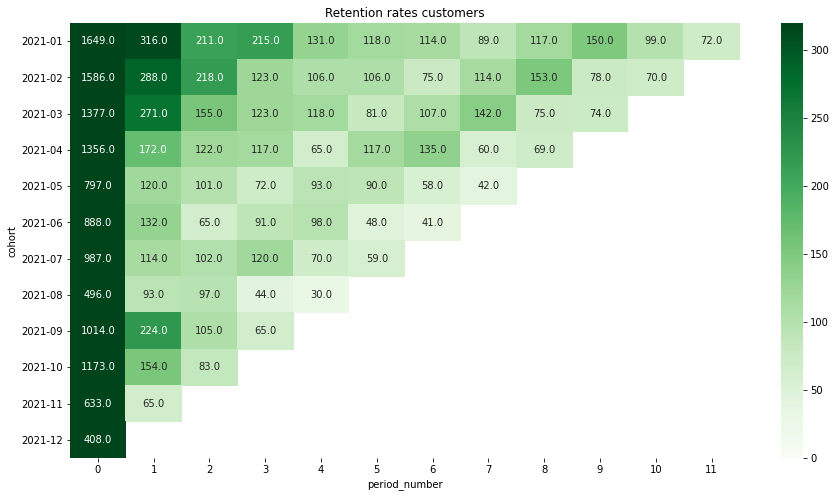

In [864]:
plt.figure(figsize=(15, 8))
plt.title('Retention rates customers')
sns.heatmap(data=cohort_pivot,annot = True,fmt = '',vmin = 0,vmax = 320, cmap="Greens")
plt.show()

#### 11.2 Retention Подписка<a id="step_11_2"></a>

 [Вернуться в начало](#stepend)</n>

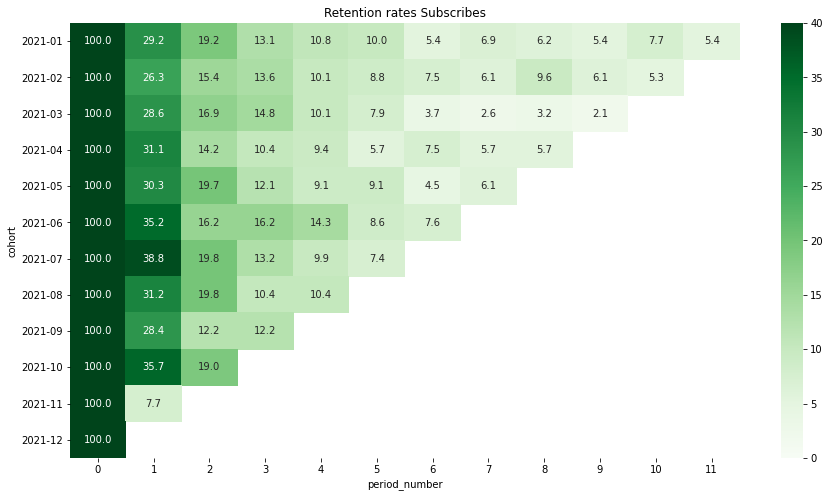

In [865]:
subs = subscription.copy()

subs['order_m'] = subs['order_date']
subs['reg_m'] = subs['reg_date']
subs['order_date'] = subs['order_date'].apply(pd.to_datetime )
subs['reg_date'] = subs['reg_date'].apply(pd.to_datetime )
subs['id_user'] = subs['id_user'].astype(str)
subs['earn'] = subs['earn'].astype(float)

# Создадим датаферейм с датой первой покупки для каждого пользователя
client_first_date = subs.groupby('id_user')['order_date'].min().reset_index()
# Переименуем колонку
client_first_date = client_first_date.rename(columns={'order_date': 'first_sale_date'}) 

subs = subs.merge(client_first_date, how= 'left', on ='id_user')

# Создадим колонки с датой покупки и датой первой покупки в формате год-месяц
subs['y_m_sale'] = subs['order_date'].dt.to_period('M')
subs['cohort'] = subs['first_sale_date'].dt.to_period('M')

# Сформируем таблицу для когортного анализа
cohort_retention = subs.copy()
cohort_retention = cohort_retention[['id_user', 'sales_num', 'order_date']]


# Создадим таблицу, в которой посчитаем кол-во пользователей в каждой когорте
subs = subs.groupby(['cohort', 'y_m_sale']).agg(n_customers=('id_user', 'nunique')).reset_index(drop=False)
subs['period_number'] = (subs.y_m_sale - subs.cohort).apply(attrgetter('n'))

# Создадим сводную таблицу
cohort_pivot = subs.pivot_table(index='cohort', columns='period_number', values='n_customers')

# Создадим отдельную переменную с номером когорты и кол-вом пользователей в ней, для использования в графике
cohort_size = cohort_pivot.iloc[:, 0]

# Используем данные из предыдущего шага для деления по когортам
retention_matrix = cohort_pivot.divide(cohort_size, axis=0)
retention = (retention_matrix*100).round(1)

# Построим тепловую карту удержания (проценты)
plt.figure(figsize=(15, 8))
plt.title('Retention rates Subscribes')
sns.heatmap(data=retention,annot = True,fmt = '',vmin = 0.0,vmax = 40,cmap="Greens")
plt.show()


#### 11.3 Выручка<a id="step_11_3"></a>

 [Вернуться в начало](#stepend)</n>

In [866]:
cohort_revenue = cohort_revenue.merge(client_first_date, how= 'left', on ='id_user')
cost = costs.copy()
cost = cost[['date', 'spent']]
cost['date'] = cost['date'].apply(pd.to_datetime )
cost['y_m_sale'] = cost['date'].dt.to_period('M')
cost = cost.groupby('y_m_sale').agg({'spent':'sum'}).rename(columns={'y_m_sale':'cohort'}).reset_index()
cost['cohort'] = cost['y_m_sale'] 
cost = cost[['cohort','spent']]
cohort_revenue = cohort_revenue.groupby(['cohort', 'y_m_sale']).agg(earn=('earn', 'sum')).reset_index(drop=False)
cohort_revenue['period_number'] = (cohort_revenue.y_m_sale - cohort_revenue.cohort).apply(attrgetter('n'))
cohort_pivot_1 = cohort_revenue.pivot_table(index='cohort', columns='period_number', values='earn')
cohort_pivot_per_cent = cohort_pivot_1.copy()
cohort_pivot_1['revenue'] = cohort_pivot_1.sum(axis=1)
cohort_pivot_1 = cohort_pivot_1.merge(cost, how='left', on='cohort')
cohort_pivot_1['profit'] = (cohort_pivot_1.spent / cohort_pivot_1.revenue).round(2)


In [867]:
cohort_pivot_1


,cohort,0,1,2,3,4,5,6,7,8,9,10,11,revenue,spent,profit
0,2021-01,1405031.24,297819.92,257705.99,170870.05,147366.63,107756.62,109199.26,84632.85,112502.25,154374.57,130173.36,92662.17,3070094.91,856576,0.28
1,2021-02,1418571.08,299524.49,194667.88,164829.70,87075.00,92349.26,74490.25,112558.66,157857.48,126878.66,95642.51,NaN,2824444.97,743010,0.26
2,2021-03,1630262.25,327124.03,199507.84,110840.68,130584.68,102627.00,146678.69,174391.77,171447.24,112420.96,NaN,NaN,3105885.14,981829,0.32
3,2021-04,1465677.61,168112.07,99756.45,97791.31,93365.99,103573.27,163780.99,100309.44,110735.14,NaN,NaN,NaN,2403102.27,512260,0.21
4,2021-05,1114491.67,156302.89,125446.95,112249.57,117285.96,95866.52,74112.35,33720.19,NaN,NaN,NaN,NaN,1829476.10,429310,0.23
5,2021-06,791897.87,147779.21,99123.52,113239.10,163514.35,90293.54,110744.03,NaN,NaN,NaN,NaN,NaN,1516591.62,581300,0.38
6,2021-07,998963.45,152833.13,107300.09,148278.62,107073.32,73150.85,NaN,NaN,NaN,NaN,NaN,NaN,1587599.46,537500,0.34
7,2021-08,724123.71,153288.83,125978.94,63390.48,55465.88,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1122247.84,356350,0.32
8,2021-09,1176122.56,296793.91,122515.50,87936.96,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1683368.93,274000,0.16
9,2021-10,1353334.78,243899.82,96213.13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1693447.73,300621,0.18


### `12. Выводы и дальнейшие шаги`<a id="step12"></a>

1. Как правило человек покупает в день регистрации, между покупкой [тут](#point1).


2. Существеннаяя доля покупок приходится на вебинары, интенсивы, подписку, далее — курс и трипвайер. Пик продаж внутри месяца приходится на середину-ближе к концу месяца. Далее провал до следующей середины месяца. Аудитория чувствительна к цене и покупки планирует на период ближе к зарплате. К началу учебного сезонна - август-сентябрь спад продаж и конец года. Стоит рассмотреть возможность снизить объем персональных коммуникаций в начале месяца [тут](#point2)


3. Существенный провал в кол-ве покупок происходит уже со второй покупки. Тут стоит рассмотреть конверсию во вторую покупку в зависимости от когорты и типа первого продукта, что рассмотрено в дальнейшем [тут](#point3)


4. Среднее кол-во дней между покупками снижается от когорте к когорте, здесь делаю вывод, что наблюдается эффект от введенной коммуникации - велком цепочка, спеицальные предложения и прогрев. Следует дополнительно изучить на каком этупе коммуникации человек делает покупку, характер взаимодействия с инструментами коммуникации [тут](#point4) . Такая же картина — снижения дней между покупками наблюдается и в разрезе когорт. Стоит посмотреть на 7 и 8 когорты - именно там скорее произошло качественное изменение [тут](#point5). Но при этом наблюдается снижение кол-ва покупок от когорте к когорте [тут](#point6). И дополнение — средний чек при этом планомерно растет [тут](#point7)


5. Кол-во покупок, — в зрелых когортах среднее кол-во покупок равно 3 [тут](#point8). От когорты и от номера покупки тренд не меняется, лидируют Вебинар, Интенсив, Курс, Подписка, Трипвайер. Покупательское поведение практические не изменилось. Второй покупкой наблюдается рост подписки - на втором месте и далее подписка лидирует после вебинара [тут](#point9)

   5.1 Следует более подробно изучить цепочку конверсий, но сейчас видно, что стартовые продукты, как Рабочая программа и Трипвайер судя по всему хорошо конвертят на Вебинар. Тут все нормально. Вебинар хорошо конвертит на Подписку и Интенсив. Интенсив в свою очередь на Курс. 

   5.2 А вот в Мастер-классе наблюдается сбой. Мастер-класс конвертит хорошо на продукты ниже уровнем - на подписку и вебинар. Следует посмотреть, есть ли разница по выручке в зависимости от первой продажи. Также цепочку конверсии можно изучить в п 9.5.1. меняя комбинацию продуктов [тут](#point10) Или здесь, указывая первый продукт [тут](#point11)

   5.3 На основе анализа покупок с разделением на продукты и тип первого продукта [тут](#point12) получается, что после первой покупки приобретается каждый продукт по 1 разу. Имеет смысл исследовать возможность повышения стоимости подписки.


6. Наблюдается возрастающий тренд среднего чека до 11-13 покупки, с небольшим вкладом подписки в его размер [тут](#point13). Рост средней стоимости покупки наблюдается на 11,12,13,16,17,26,30 покупки. Если смотреть на средний чек по когортам [тут](#point14), то здесь обнаружится интересный момент для исследования — кардинальное изменение среднего чека в когорте 2021-11 в покупках 8 и 10. 


* Это не выброс, — нужно поговорить с ними, выявить их контекст, драйверы, возможно удасться это масштабировать. Причем наблюдается это именно в одной когорте. Это единичный случай.


7. Наблюдается снижение конверсии в первую покупку [тут](#point15), но ранее выяснили, что средний чек растет при этом. Нужно начать работы по росту конверсии в первую покупку, и вероятнее всего — со структуры страниц продуктов. И снижение конверсии в первую покупку наблюдается по всем когортам, в независимости от типа первого продукта [тут](#point16)

  7.2 Глобально получается, конверсии распределены следующим образом:
  

- Конверсия в первую покупку 0.82 %
- Конверсия во вторую покупку 0.03 %
- Конверсия в третью покупку 0.02 %
- Конверсия в четвертую покупку 0.01 %
- Конверсия в пятую покупку 0.01 %
- Конверсия в шестую покупку 0.004 %
- Конверсия в седьмую покупку 0.003 %


8. Исследование подписки, показало, что средняя конверсия в подписку, как первый продукт составляет 0,02%. ПОдписка не яв-ся продуктом "паровозом", и вносит небольшой вклад в выручку [тут](#point7). Наиболее часто подписку покупают 2,3 и 1 покупкой соответсвенно, в порядке убывания. Можно посмотреть продукт, который хорошо конвертит в подписку [тут](#point12)


- Премиум подписка яв-ся преимущественно третьей покупкой у большинства клиентов
- Среднее кол-во покупок премиумного тарифа 1.0
- Среднее кол-во покупок среднего тарифа 1.02
- Среднее кол-во покупок начального тарифа 2.47

  8.1. Конверсии в последующие подписки [тут](#point13) показывают, что средний тариф подписки покупают после начального и с конверсией в 2,4% купят еще раз средний тариф. Если посмотрим на распределение конверсии и дней между покупками подписки начального тарифа, то увидим, что после покупки 1 и 2 раз конверсия в последующие покупки возрастает, и не опускается ниже 30 вплоть до 13 покупки подписки. Важно, закрыть все барьеры в подписку, возникающие у подписчиков 1 и 2 покупки. Чтобы опыт первой покупки был на высоком уровне.
  
  8.2 Также видно, что кол-во дней между подписками равномерно и составляется период ближе к концу месяца. Не наблюдается ситуации, когда человек подписывается, отписывается, и через много месяцев подписывается снова. То есть, — если потеряли подписчика, то обратно в подписку он скорее всего не вернется.


9. Из когортного анализа наблюдается, что уже во втором месяце происходит резкое снижение (индексируется как 1), в среднем около 80% клиентов не совершают никаких покупок во второй месяц. Стоит обратить внимание на когорту 2021-09, и механики работы с ней + если обратить внимание на диагональ идущую от 2021-09, то скорее вероятнее всего это не случайность и к этому приводит изменение механики взаимодействия. А когорта 2021-08 показывает хороший результат в третий месяц — нужно разобраться, к чему это привело — посмотреть подробнее распределение покупок в первой покупке, второй, третьей, + инструменты коммуникации с ними и их реакция на них, — возможно здесь спрятаны механизмы, которые следует масштабировать. 

  9.1 Все когорты окупаются в первый месяц

### `13. Модель юнит-экономики в Google Sheets`<a id="step13"></a>

На основе анализа была сделана модель юнит-экономики портала

Посмотреть модель можно здесь: [Модель юнит-экономики](https://docs.google.com/spreadsheets/d/1wn9SelDJIRS0H85UC8_lxbvhup3n5LA88nZ3PTuQYHg/edit?usp=sharing)

### [Вернуться в начало](#stepend)</n>